In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dhaka-air-quality-2000-2025-synthetic-dataset/dhaka_air_quality_2000_2025.csv


In [2]:
# lets load the dataset 
df = pd.read_csv("/kaggle/input/dhaka-air-quality-2000-2025-synthetic-dataset/dhaka_air_quality_2000_2025.csv")
df

datetime         AQI       PM2.5        PM10         O3  \
0       2000-01-01 00:00:00  121.861086   44.200712   93.224101  20.586862   
1       2000-01-01 01:00:00   99.598077   35.212704   78.893066  22.429471   
2       2000-01-01 02:00:00  132.852834   48.575428  118.693959  37.838094   
3       2000-01-01 03:00:00  154.588259   64.208516   86.427166  26.747684   
4       2000-01-01 04:00:00  114.102260   41.112699   70.193382  33.192759   
...                     ...         ...         ...         ...        ...   
225811  2025-10-04 19:00:00  207.114725  157.607611  243.872762  46.377704   
225812  2025-10-04 20:00:00  206.927397  157.420470  243.006506  39.320982   
225813  2025-10-04 21:00:00  191.182348  133.664097  222.090884  47.043134   
225814  2025-10-04 22:00:00  176.907248  106.569957  169.771198  41.824699   
225815  2025-10-04 23:00:00  187.985824  127.597094  230.334810  38.649642   

              NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
0       15.391414  28.219932  1.049477    20.956667  71.272569    8.375675   
1       26.824534  24.385188  0.943859    13.761031  42.616871   10.880553   
2       33.403493  28.951413  0.887131    20.216907  59.169387   15.041183   
3       12.137395  26.950990  0.793261    18.642574  62.756439    9.904413   
4       25.313206  20.741976  1.059887    18.834718  56.369280   14.632070   
...           ...        ...       ...          ...        ...         ...   
225811  38.243954  26.807971  1.243414    28.259699  62.551322   11.818046   
225812  40.727546  35.334455  1.648275    24.709986  55.136078    8.800161   
225813  29.740886  31.693231  1.516578    23.832922  68.360762   13.813644   
225814  24.414738  28.654861  1.890719    23.119236  68.842075   11.024805   
225815  32.247229  22.446088  1.949910    19.342047  60.956672    8.055435   

           Pressure  
0       1011.742574  
1       1010.949986  
2       1012.065387  
3       1010.162227  
4       1007.067421  
...             ...  
225811  1012.764603  
225812  1017.514260  
225813  1020.041276  
225814  1015.671335  
225815  1020.880531  

[225816 rows x 12 columns]

In [3]:
# lets understand the disrtibution and basic knowledge of dataset
print(f"Shape of dataset {df.shape}")
print("==="*30)
print(f"Feature name are {list(df.columns)}")
print("==="*30)
print(f"datatypes of each feature \n {df.dtypes}")
print("==="*30)
print(f"numerical datatypes features are {df.select_dtypes(include = np.number).columns.tolist()}")
print("==="*30)
print(f"object datatypes feature are {df.select_dtypes(include = 'O').columns.tolist()}")
print("==="*30)
print(f"Information of dataset {df.info()}")
print("==="*30)
print(f"describtion of numerical columns \n {df.describe()}")
print("==="*30)
print(f"descrption for non integer columne \n{df.describe(include = 'O')}")
print("==="*30)

Shape of dataset (225816, 12)
Feature name are ['datetime', 'AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity', 'Wind_Speed', 'Pressure']
datatypes of each feature 
 datetime        object
AQI            float64
PM2.5          float64
PM10           float64
O3             float64
NO2            float64
SO2            float64
CO             float64
Temperature    float64
Humidity       float64
Wind_Speed     float64
Pressure       float64
dtype: object
numerical datatypes features are ['AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity', 'Wind_Speed', 'Pressure']
object datatypes feature are ['datetime']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225816 entries, 0 to 225815
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     225816 non-null  object 
 1   AQI          225816 non-null  float64
 2   PM2.5        225816 non-null  float64
 3   PM10     

In [4]:
# lets check the null values
df.isna().sum()

datetime       0
AQI            0
PM2.5          0
PM10           0
O3             0
NO2            0
SO2            0
CO             0
Temperature    0
Humidity       0
Wind_Speed     0
Pressure       0
dtype: int64

In [5]:
# lets check for ? values in dataset
(df=="?").sum()

datetime       0
AQI            0
PM2.5          0
PM10           0
O3             0
NO2            0
SO2            0
CO             0
Temperature    0
Humidity       0
Wind_Speed     0
Pressure       0
dtype: int64

# Dataset Overview and Initial Observations

## 1. Shape of Dataset
- The dataset contains **225,816 rows** and **12 columns**.

## 2. Features
| Feature      | Data Type | Description                 |
|-------------|-----------|-----------------------------|
| datetime    | object    | Timestamp of observation    |
| AQI         | float64   | Air Quality Index           |
| PM2.5       | float64   | Particulate Matter 2.5     |
| PM10        | float64   | Particulate Matter 10      |
| O3          | float64   | Ozone concentration        |
| NO2         | float64   | Nitrogen Dioxide           |
| SO2         | float64   | Sulfur Dioxide             |
| CO          | float64   | Carbon Monoxide            |
| Temperature | float64   | Temperature in °C          |
| Humidity    | float64   | Relative Humidity in %     |
| Wind_Speed  | float64   | Wind speed in km/h         |
| Pressure    | float64   | Atmospheric Pressure in hPa|

- **Numerical features:** AQI, PM2.5, PM10, O3, NO2, SO2, CO, Temperature, Humidity, Wind_Speed, Pressure  
- **Non-numerical features:** datetime  

## 3. Datatypes and Memory Usage
- 11 numerical columns (float64), 1 object column (datetime)  
- Memory usage: ~20.7 MB  

## 4. Summary Statistics of Numerical Features
| Feature      | Min   | 25%    | 50%    | 75%    | Max    | Mean    | Std     |
|-------------|-------|--------|--------|--------|--------|---------|---------|
| AQI         | 20.83 | 153.49 | 171.49 | 194.74 | 299.60 | 173.88  | 47.85   |
| PM2.5       | 5.0   | 62.13  | 96.29  | 140.41 | 250.0  | 105.49  | 55.87   |
| PM10        | 10.0  | 105.42 | 164.38 | 240.08 | 400.0  | 178.66  | 95.03   |
| O3          | 5.0   | 37.13  | 48.39  | 61.14  | 124.49 | 50.07   | 18.18   |
| NO2         | 5.0   | 25.62  | 33.78  | 42.60  | 87.30  | 34.29   | 12.18   |
| SO2         | 2.0   | 17.72  | 22.48  | 27.79  | 57.27  | 23.08   | 7.69    |
| CO          | 0.1   | 1.25   | 1.61   | 2.01   | 3.76   | 1.64    | 0.53    |
| Temperature | 10.34 | 22.08  | 26.06  | 29.99  | 40.0   | 26.04   | 5.14    |
| Humidity    | 30.0  | 62.33  | 69.34  | 77.49  | 95.0   | 70.02   | 10.62   |
| Wind_Speed  | 8.0   | 9.44   | 11.47  | 14.94  | 40.0   | 12.99   | 4.93    |
| Pressure    | 990.0 | 1007.62| 1012.99| 1018.40| 1030.0 | 1012.95 | 7.86    |

## 5. Non-Numerical Feature
- `datetime`: 225,816 unique timestamps, no missing values  

## 6. Missing Values
- There are **no null values** in the dataset.  
- There are **no `?` values** in any column.  



In [6]:
# lets import libraries
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Distribtuion

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


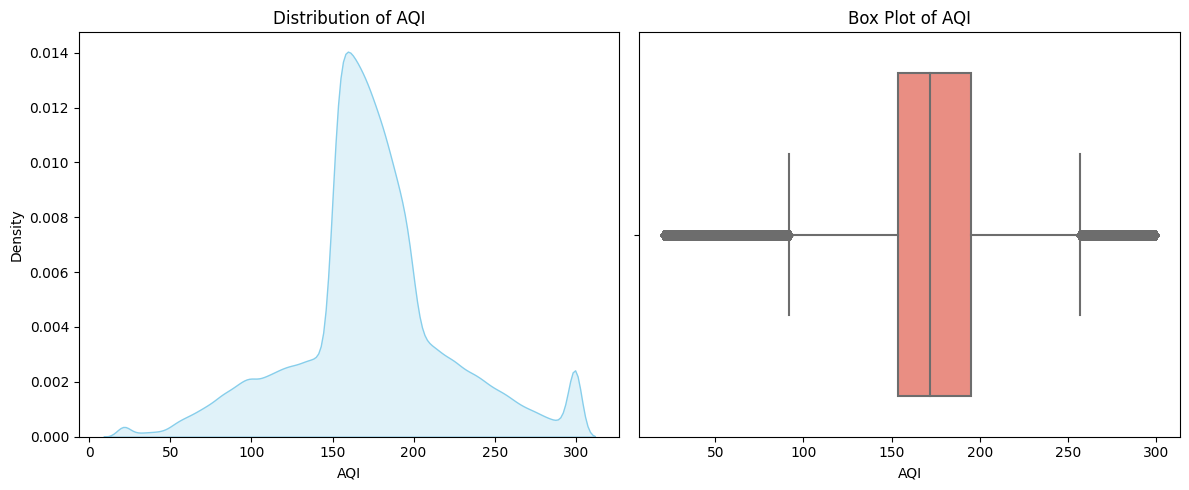

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


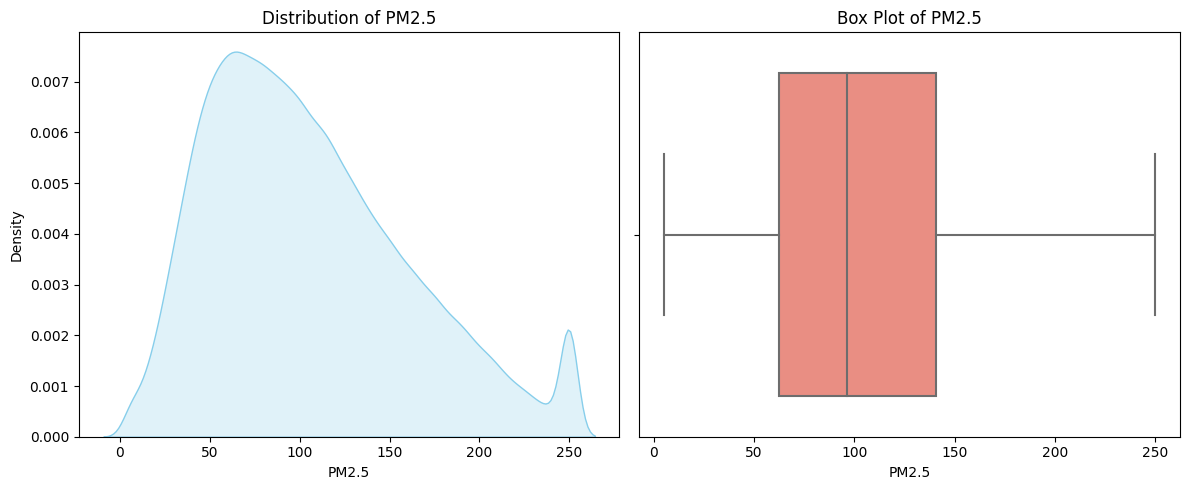

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


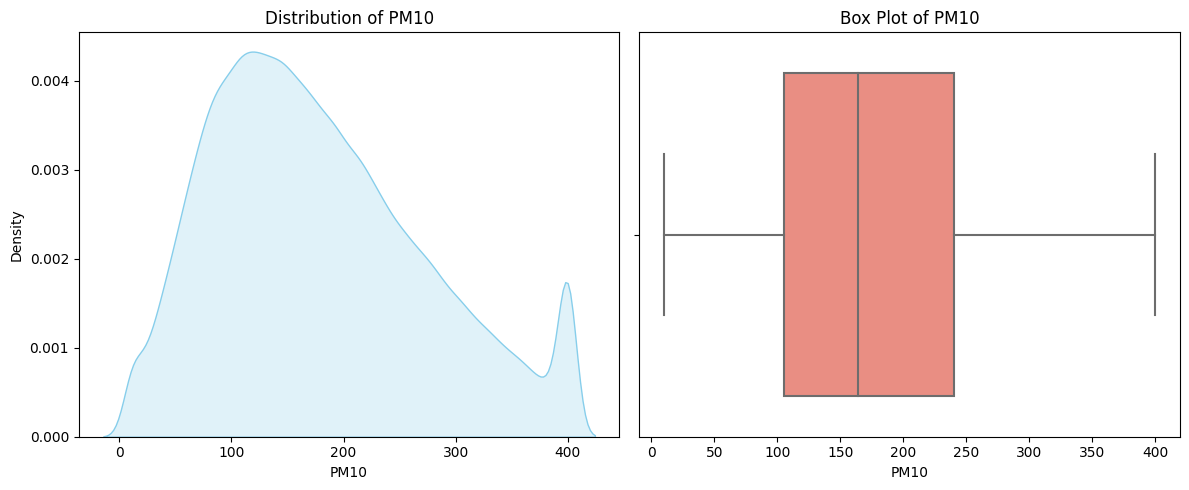

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


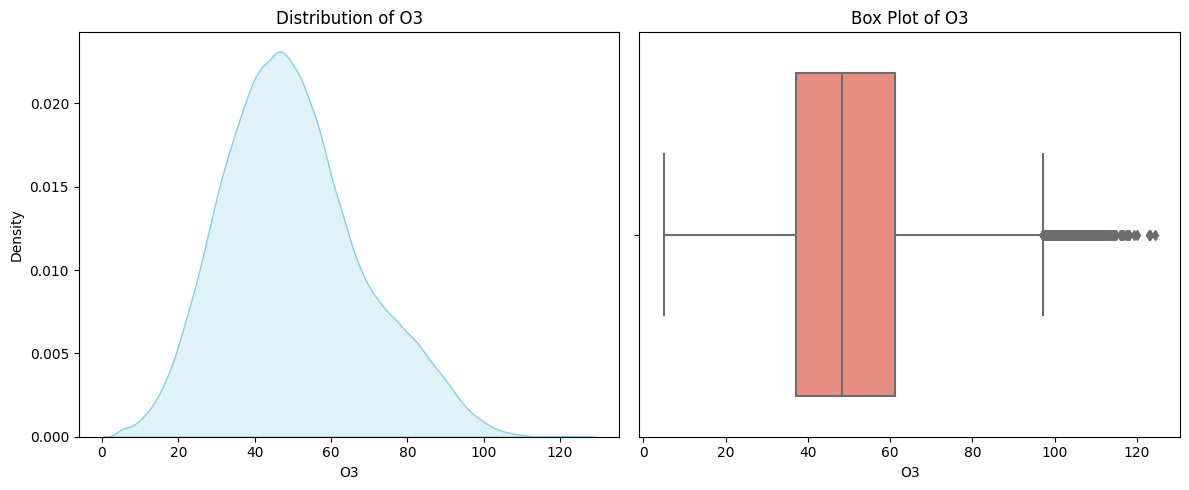

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


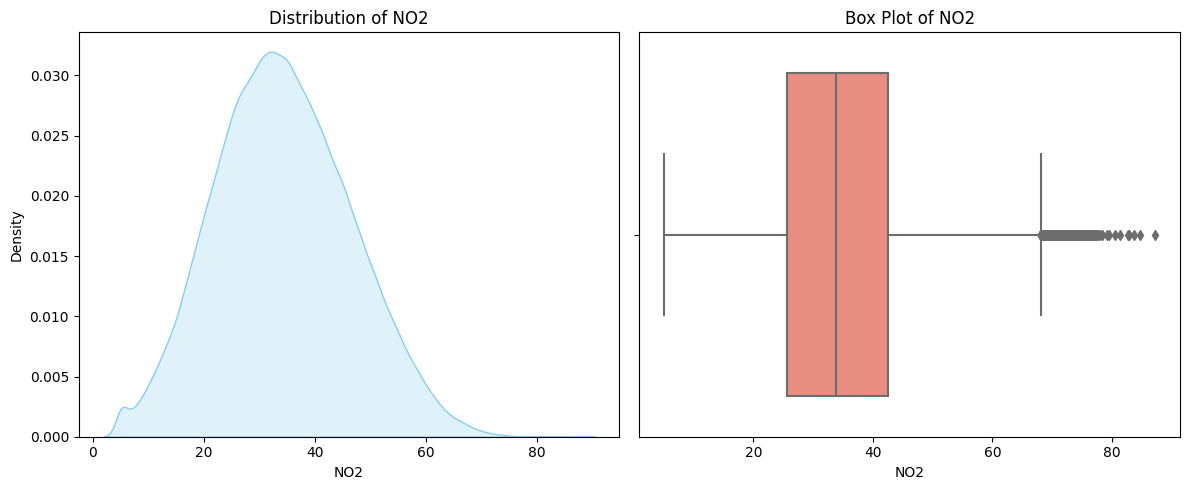

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


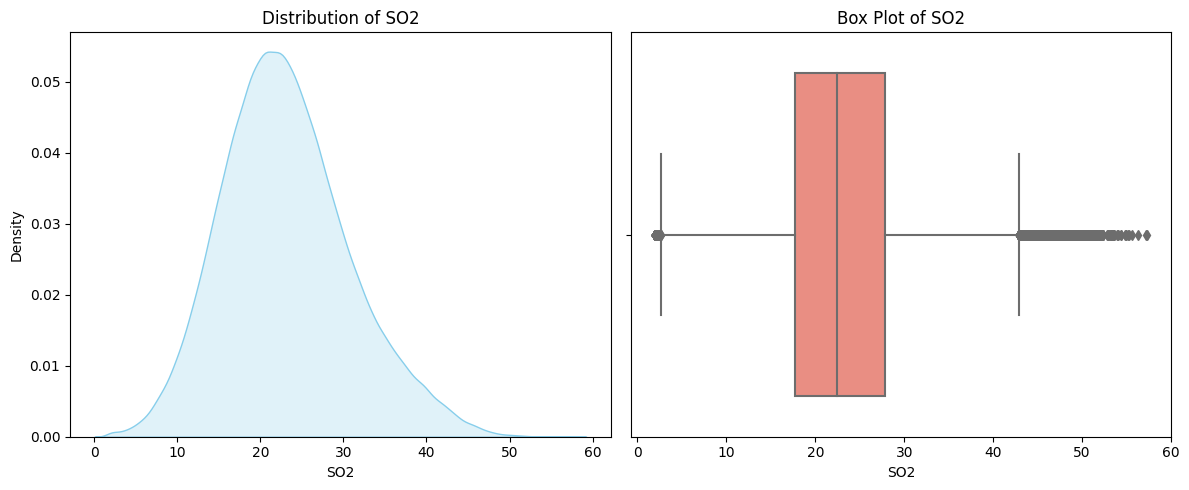

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


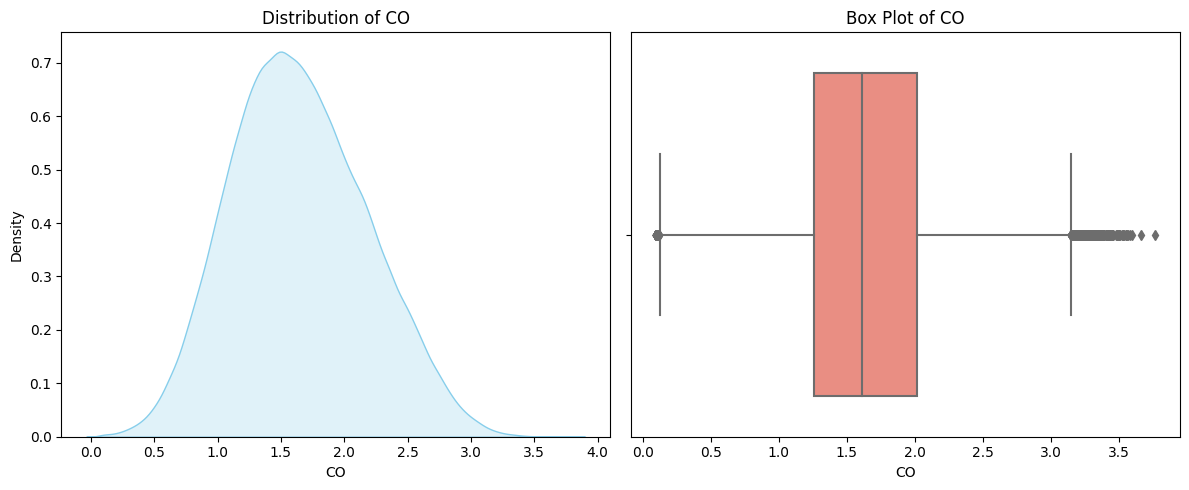

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


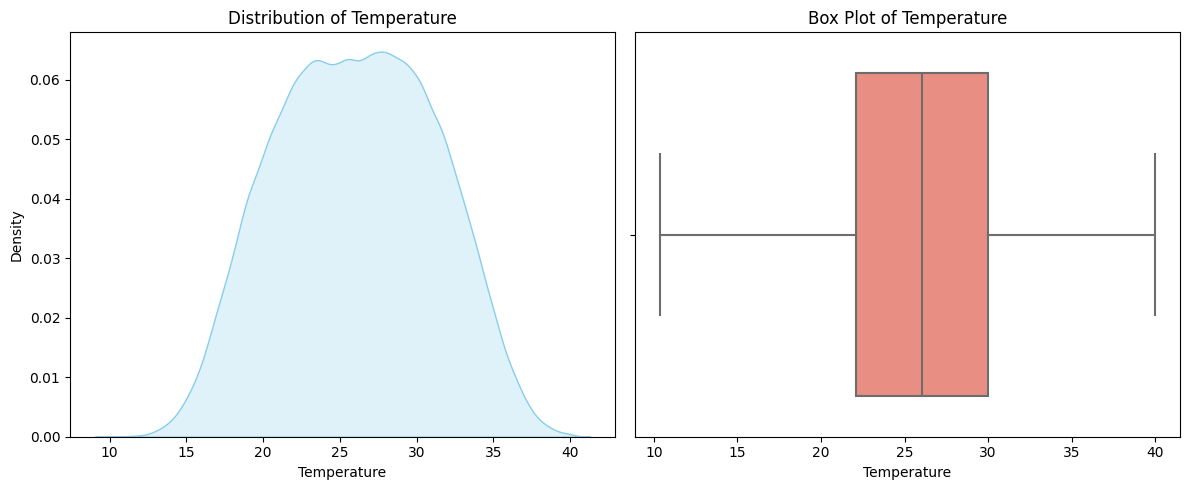

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


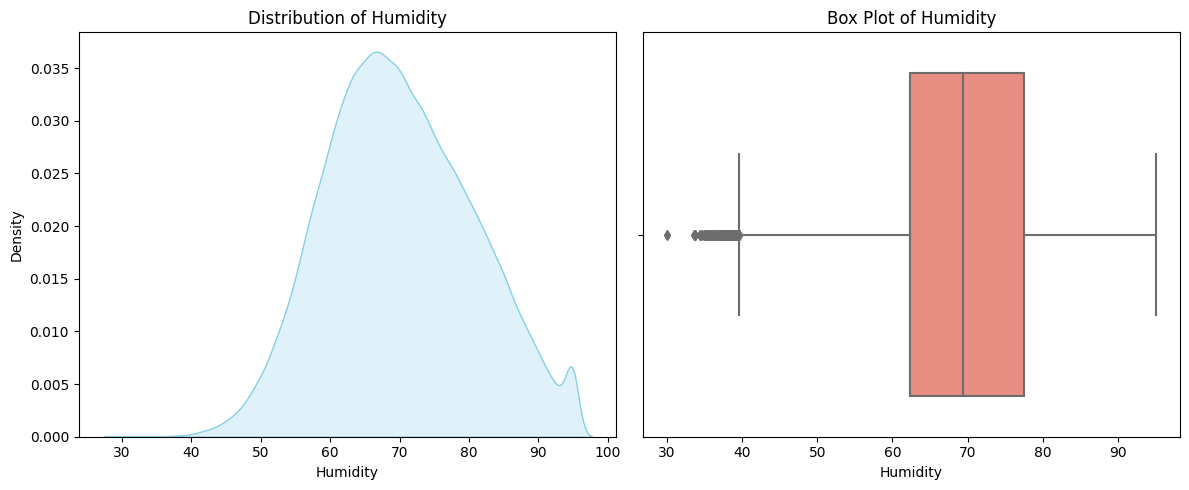

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


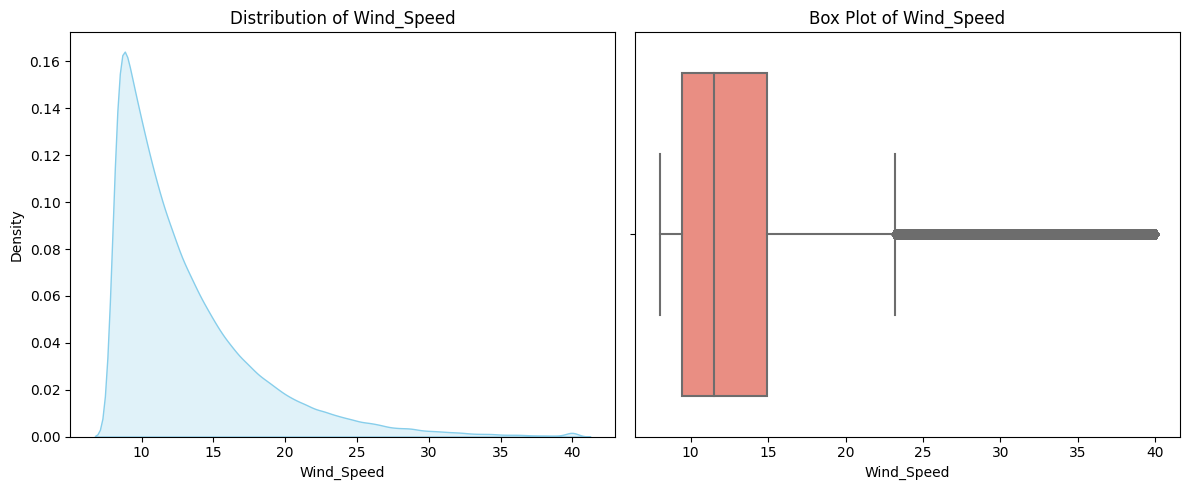

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


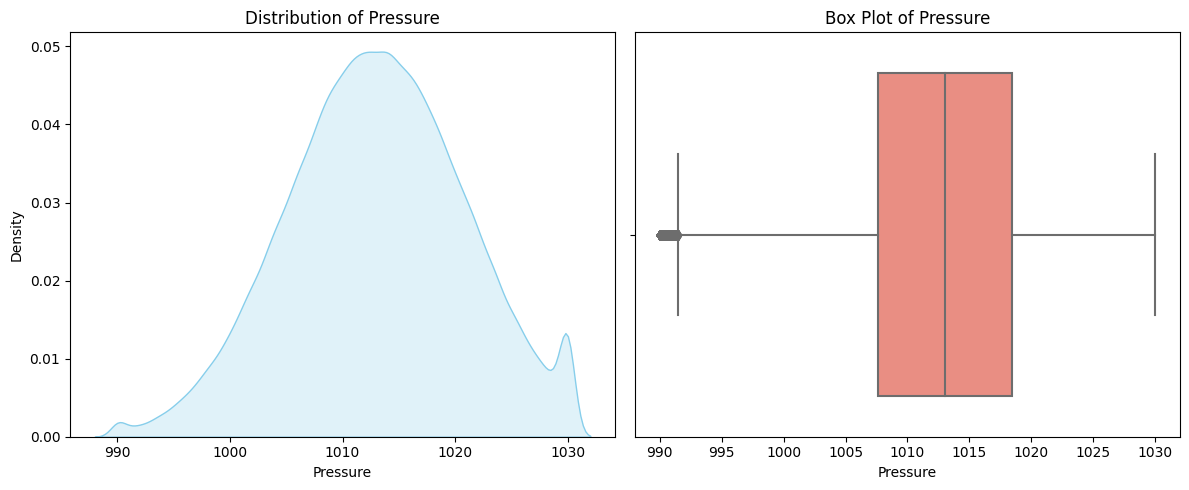

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Loop through each numerical column
for col in df.drop(columns="datetime").columns:
    plt.figure(figsize=(12, 5))

    # KDE plot (distribution)
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df, x=col, fill=True, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Density")

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color="salmon")
    plt.title(f"Box Plot of {col}", fontsize=12)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    

## Outerlier Analysis

In [8]:
# here we find that there are oulineras are present in our data
# LETS CHECK THE OUTLINERS
for col in df.drop(columns = "datetime"):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Column: {col}")
    print(f" - Total Outliers: {len(outliers)}, Percentage of outliners : {(len(outliers)/df.shape[0])*100:.2f}%")
    print(f" - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print("=" * 60)
  
    

Column: AQI
 - Total Outliers: 25630, Percentage of outliners : 11.35%
 - Lower Bound: 91.63, Upper Bound: 256.61
Column: PM2.5
 - Total Outliers: 0, Percentage of outliners : 0.00%
 - Lower Bound: -55.29, Upper Bound: 257.84
Column: PM10
 - Total Outliers: 0, Percentage of outliners : 0.00%
 - Lower Bound: -96.55, Upper Bound: 442.06
Column: O3
 - Total Outliers: 1651, Percentage of outliners : 0.73%
 - Lower Bound: 1.11, Upper Bound: 97.17
Column: NO2
 - Total Outliers: 579, Percentage of outliners : 0.26%
 - Lower Bound: 0.15, Upper Bound: 68.08
Column: SO2
 - Total Outliers: 2575, Percentage of outliners : 1.14%
 - Lower Bound: 2.62, Upper Bound: 42.90
Column: CO
 - Total Outliers: 490, Percentage of outliners : 0.22%
 - Lower Bound: 0.12, Upper Bound: 3.15
Column: Temperature
 - Total Outliers: 0, Percentage of outliners : 0.00%
 - Lower Bound: 10.22, Upper Bound: 41.87
Column: Humidity
 - Total Outliers: 109, Percentage of outliners : 0.05%
 - Lower Bound: 39.59, Upper Bound: 100

AQI (Air Quality Index) is not a random measurement error — it’s a composite environmental indicator.
If, on some days, pollutant levels like PM2.5, PM10, or NO₂ spike, the AQI will naturally jump too.

So, those “outliers” might actually represent:

Pollution events (Diwali, crop burning, industrial emission days)

Weather conditions (low wind speed, temperature inversion)

Sensor-recorded real spikes, not noise

👉 Therefore, removing or capping AQI outliers can distort the real environmental pattern.

## Yearly Analysis 

In [9]:
# Ensure datetime column is in proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year
df['year'] = df['datetime'].dt.year
df


datetime         AQI       PM2.5        PM10         O3  \
0      2000-01-01 00:00:00  121.861086   44.200712   93.224101  20.586862   
1      2000-01-01 01:00:00   99.598077   35.212704   78.893066  22.429471   
2      2000-01-01 02:00:00  132.852834   48.575428  118.693959  37.838094   
3      2000-01-01 03:00:00  154.588259   64.208516   86.427166  26.747684   
4      2000-01-01 04:00:00  114.102260   41.112699   70.193382  33.192759   
...                    ...         ...         ...         ...        ...   
225811 2025-10-04 19:00:00  207.114725  157.607611  243.872762  46.377704   
225812 2025-10-04 20:00:00  206.927397  157.420470  243.006506  39.320982   
225813 2025-10-04 21:00:00  191.182348  133.664097  222.090884  47.043134   
225814 2025-10-04 22:00:00  176.907248  106.569957  169.771198  41.824699   
225815 2025-10-04 23:00:00  187.985824  127.597094  230.334810  38.649642   

              NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
0       15.391414  28.219932  1.049477    20.956667  71.272569    8.375675   
1       26.824534  24.385188  0.943859    13.761031  42.616871   10.880553   
2       33.403493  28.951413  0.887131    20.216907  59.169387   15.041183   
3       12.137395  26.950990  0.793261    18.642574  62.756439    9.904413   
4       25.313206  20.741976  1.059887    18.834718  56.369280   14.632070   
...           ...        ...       ...          ...        ...         ...   
225811  38.243954  26.807971  1.243414    28.259699  62.551322   11.818046   
225812  40.727546  35.334455  1.648275    24.709986  55.136078    8.800161   
225813  29.740886  31.693231  1.516578    23.832922  68.360762   13.813644   
225814  24.414738  28.654861  1.890719    23.119236  68.842075   11.024805   
225815  32.247229  22.446088  1.949910    19.342047  60.956672    8.055435   

           Pressure  year  
0       1011.742574  2000  
1       1010.949986  2000  
2       1012.065387  2000  
3       1010.162227  2000  
4       1007.067421  2000  
...             ...   ...  
225811  1012.764603  2025  
225812  1017.514260  2025  
225813  1020.041276  2025  
225814  1015.671335  2025  
225815  1020.880531  2025  

[225816 rows x 13 columns]

                          datetime         AQI       PM2.5        PM10  \
year                                                                     
2000 2000-07-01 23:30:00.000000000  107.154206   39.563389   68.194621   
2001 2001-07-02 11:30:00.000000000  114.900151   43.657102   74.675737   
2002 2002-07-02 11:30:00.000000000  121.787182   47.647462   80.946975   
2003 2003-07-02 11:30:00.000000000  128.115421   51.860443   88.601948   
2004 2004-07-01 23:30:00.000000128  135.234127   56.773041   96.473669   
2005 2005-07-02 11:30:00.000000000  140.885035   61.388755  104.590616   
2006 2006-07-02 11:29:59.999999872  146.214551   66.356851  113.123389   
2007 2007-07-02 11:30:00.000000000  151.497199   71.480743  121.320496   
2008 2008-07-01 23:30:00.000000000  155.867846   76.611608  130.056123   
2009 2009-07-02 11:30:00.000000000  160.475606   82.240034  139.585348   
2010 2010-07-02 11:30:00.000000000  164.249363   87.614879  148.930272   
2011 2011-07-02 11:30:00.000000000  16

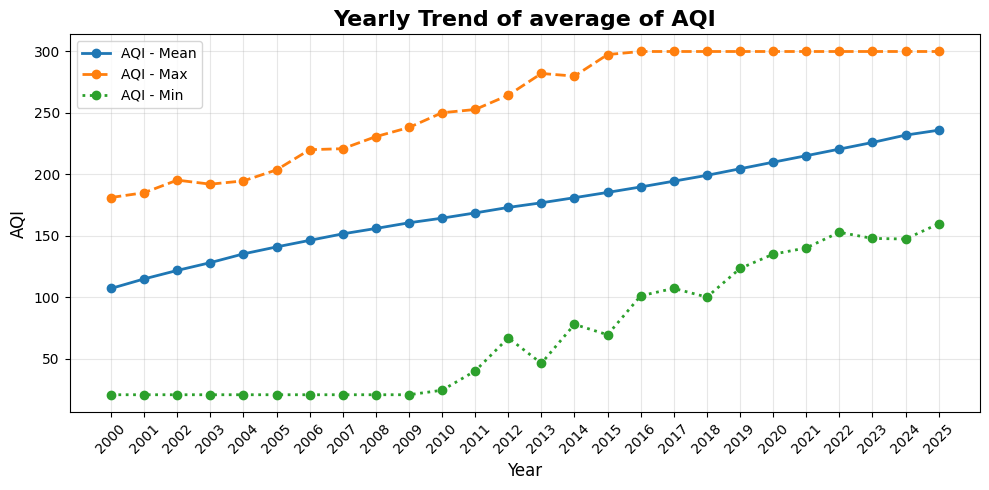

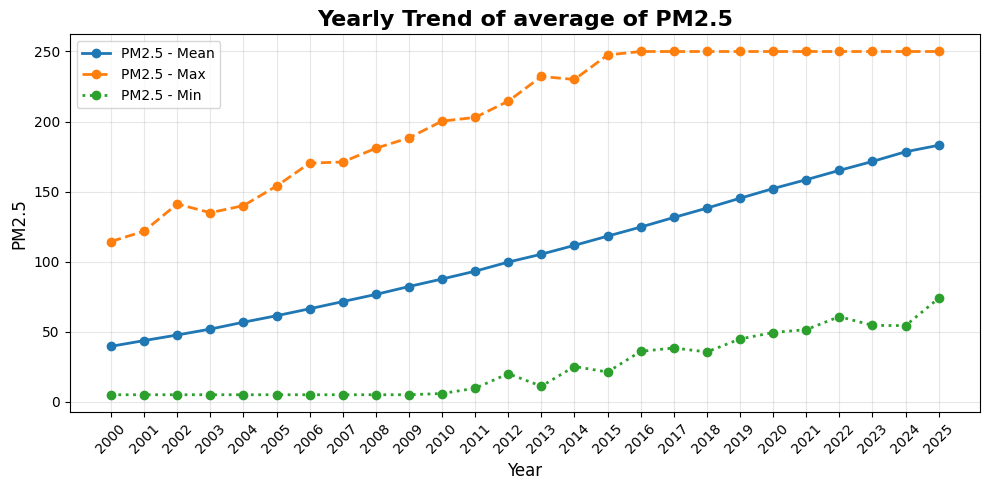

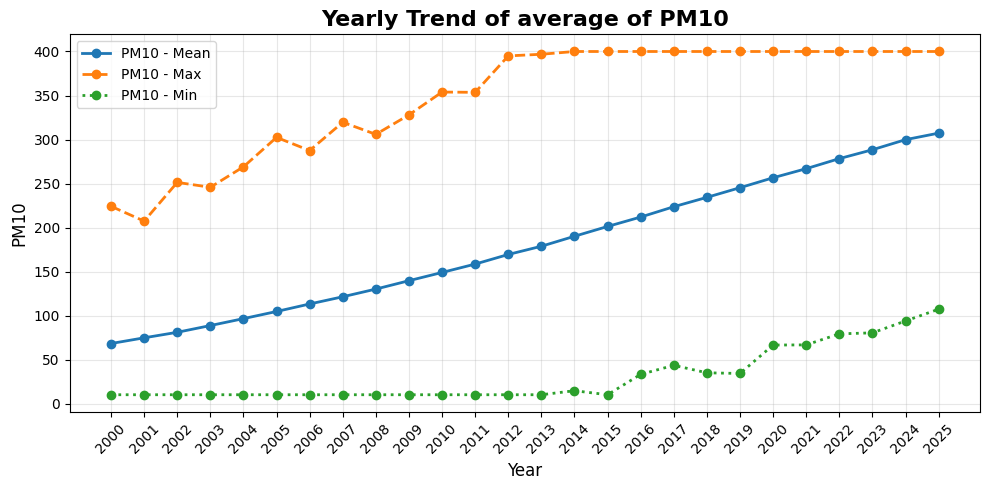

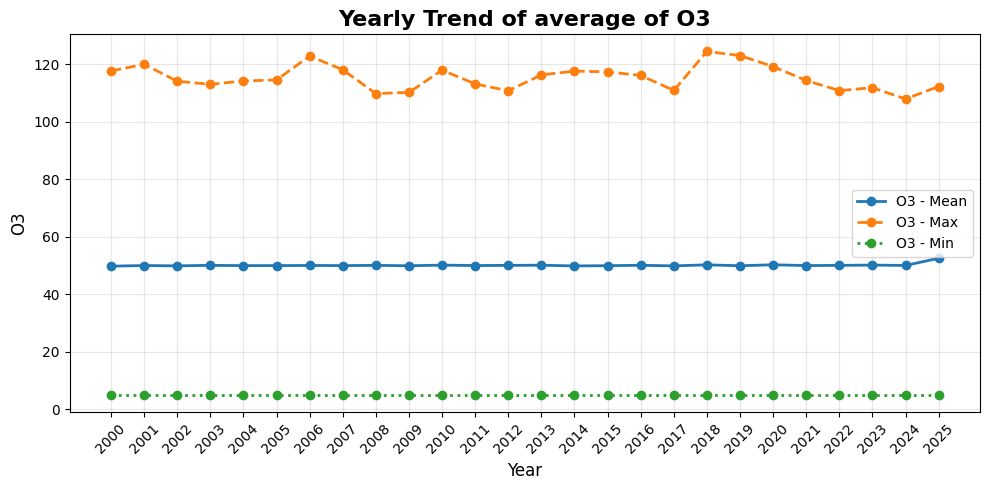

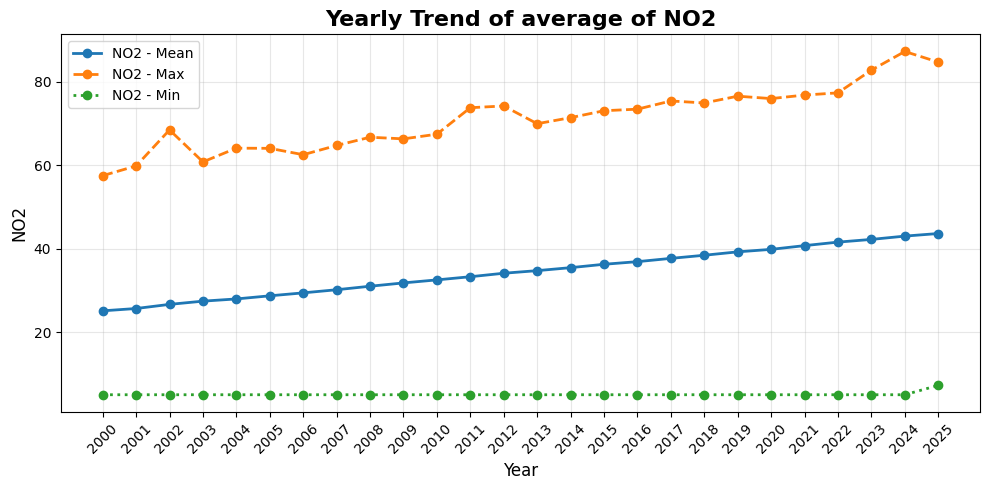

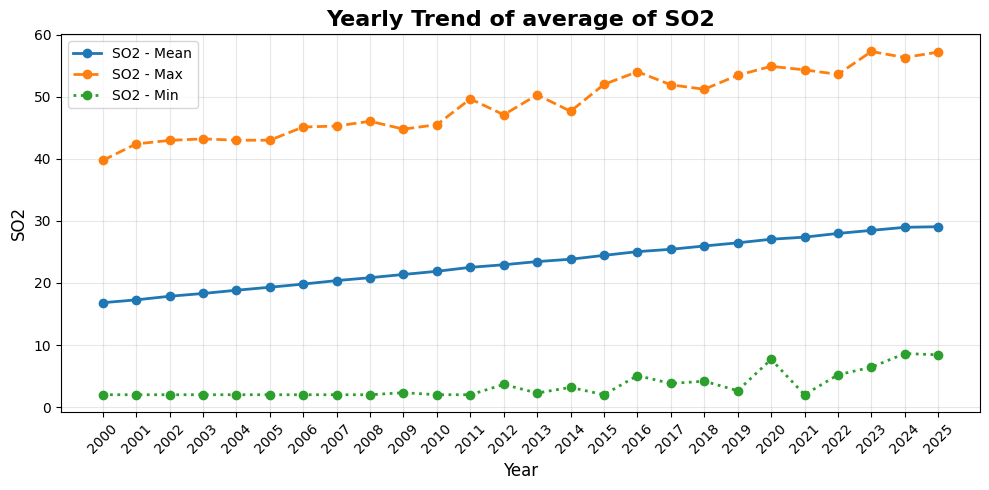

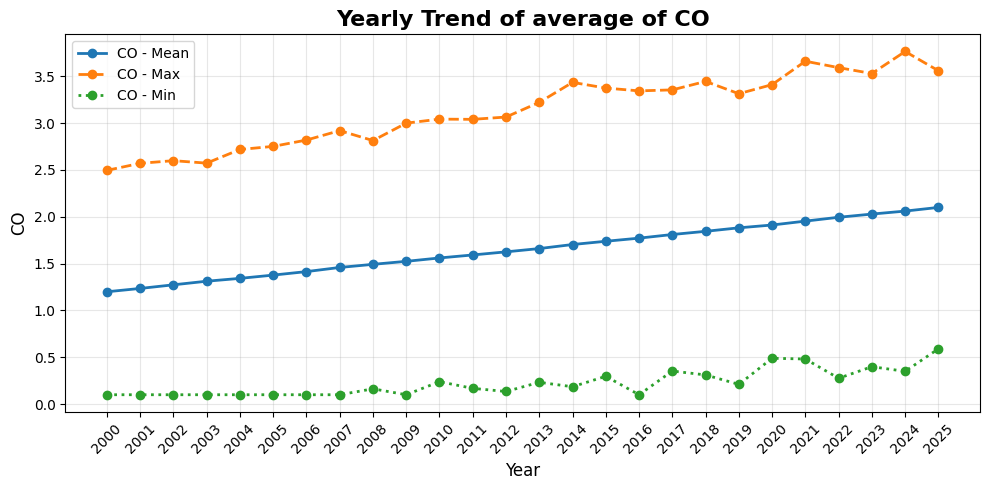

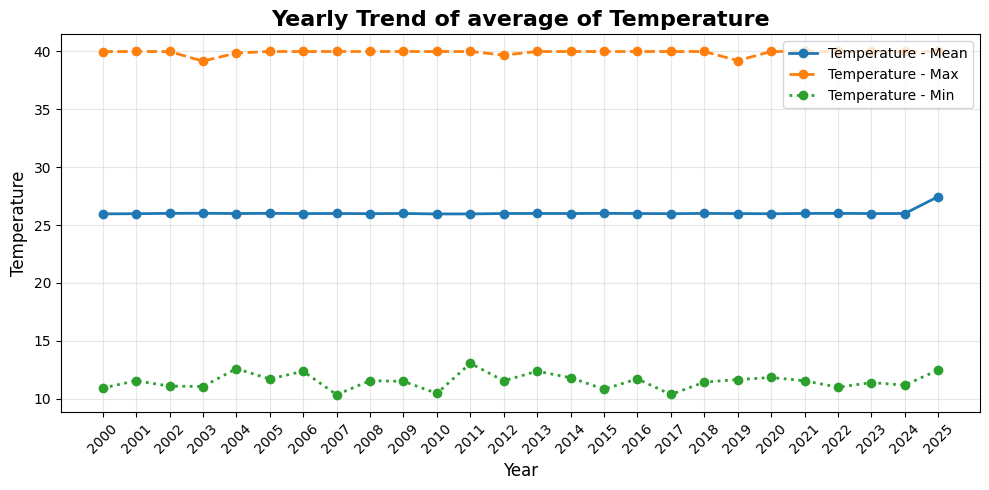

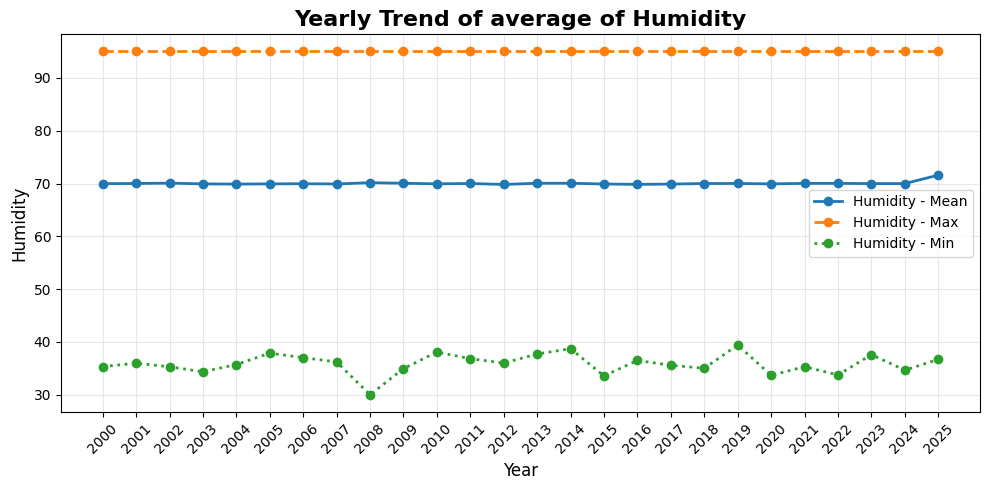

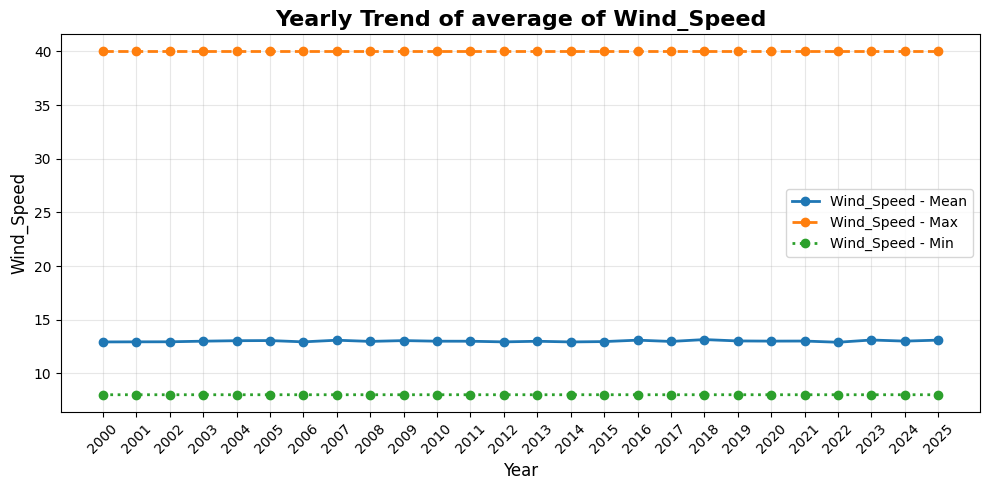

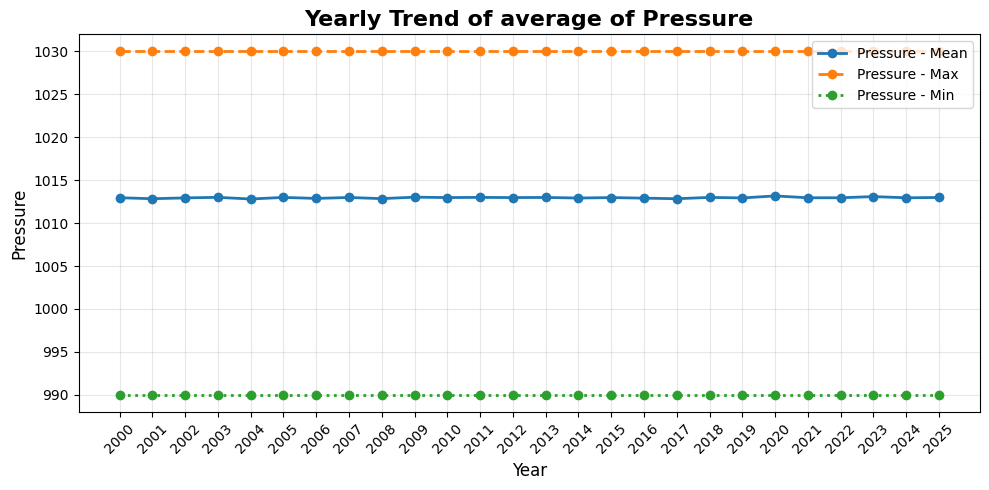

In [10]:
yearly_mean = df.groupby('year').mean()
print(yearly_mean)
yearly_max = df.groupby("year").max()
yearly_min = df.groupby("year").min()

# lets plot for yearly analysis of features 


for col in df.drop(columns=['datetime','year']).columns:
    plt.figure(figsize=(10,5))
    plt.plot(yearly_mean.index, yearly_mean[col], marker='o', linewidth=2, label=f'{col} - Mean')
    plt.plot(yearly_max.index, yearly_max[col], marker='o', linewidth=2, linestyle='--', label=f'{col} - Max')
    plt.plot(yearly_min.index, yearly_min[col], marker='o', linewidth=2, linestyle=':', label=f'{col} - Min')
    plt.title(f"Yearly Trend of average of {col}", fontsize=16, fontweight='bold')
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=yearly_mean.index, labels=yearly_mean.index, rotation=45)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Category wise analysis of each year

In [11]:
# Create AQI categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['AQI_category'] = df['AQI'].apply(categorize_aqi)
df

datetime         AQI       PM2.5        PM10         O3  \
0      2000-01-01 00:00:00  121.861086   44.200712   93.224101  20.586862   
1      2000-01-01 01:00:00   99.598077   35.212704   78.893066  22.429471   
2      2000-01-01 02:00:00  132.852834   48.575428  118.693959  37.838094   
3      2000-01-01 03:00:00  154.588259   64.208516   86.427166  26.747684   
4      2000-01-01 04:00:00  114.102260   41.112699   70.193382  33.192759   
...                    ...         ...         ...         ...        ...   
225811 2025-10-04 19:00:00  207.114725  157.607611  243.872762  46.377704   
225812 2025-10-04 20:00:00  206.927397  157.420470  243.006506  39.320982   
225813 2025-10-04 21:00:00  191.182348  133.664097  222.090884  47.043134   
225814 2025-10-04 22:00:00  176.907248  106.569957  169.771198  41.824699   
225815 2025-10-04 23:00:00  187.985824  127.597094  230.334810  38.649642   

              NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
0       15.391414  28.219932  1.049477    20.956667  71.272569    8.375675   
1       26.824534  24.385188  0.943859    13.761031  42.616871   10.880553   
2       33.403493  28.951413  0.887131    20.216907  59.169387   15.041183   
3       12.137395  26.950990  0.793261    18.642574  62.756439    9.904413   
4       25.313206  20.741976  1.059887    18.834718  56.369280   14.632070   
...           ...        ...       ...          ...        ...         ...   
225811  38.243954  26.807971  1.243414    28.259699  62.551322   11.818046   
225812  40.727546  35.334455  1.648275    24.709986  55.136078    8.800161   
225813  29.740886  31.693231  1.516578    23.832922  68.360762   13.813644   
225814  24.414738  28.654861  1.890719    23.119236  68.842075   11.024805   
225815  32.247229  22.446088  1.949910    19.342047  60.956672    8.055435   

           Pressure  year             AQI_category  
0       1011.742574  2000  Unhealthy for Sensitive  
1       1010.949986  2000                 Moderate  
2       1012.065387  2000  Unhealthy for Sensitive  
3       1010.162227  2000                Unhealthy  
4       1007.067421  2000  Unhealthy for Sensitive  
...             ...   ...                      ...  
225811  1012.764603  2025           Very Unhealthy  
225812  1017.514260  2025           Very Unhealthy  
225813  1020.041276  2025                Unhealthy  
225814  1015.671335  2025                Unhealthy  
225815  1020.880531  2025                Unhealthy  

[225816 rows x 14 columns]

In [12]:
yearlycount = df.groupby("year")["AQI_category"].value_counts().reset_index()
yearlycount

year             AQI_category  count
0   2000  Unhealthy for Sensitive   3303
1   2000                 Moderate   3186
2   2000                Unhealthy   1689
3   2000                     Good    606
4   2001  Unhealthy for Sensitive   3431
..   ...                      ...    ...
95  2024           Very Unhealthy   6053
96  2024                Unhealthy   2730
97  2024  Unhealthy for Sensitive      1
98  2025           Very Unhealthy   4776
99  2025                Unhealthy   1872

[100 rows x 3 columns]

AQI_category   Good  Moderate  Unhealthy  Unhealthy for Sensitive  \
year                                                                
2000          606.0    3186.0     1689.0                   3303.0   
2001          390.0    2670.0     2269.0                   3431.0   
2002          278.0    2199.0     2859.0                   3424.0   
2003          198.0    1810.0     3597.0                   3155.0   
2004          110.0    1334.0     4347.0                   2993.0   

AQI_category  Very Unhealthy  
year                          
2000                     0.0  
2001                     0.0  
2002                     0.0  
2003                     0.0  
2004                     0.0  


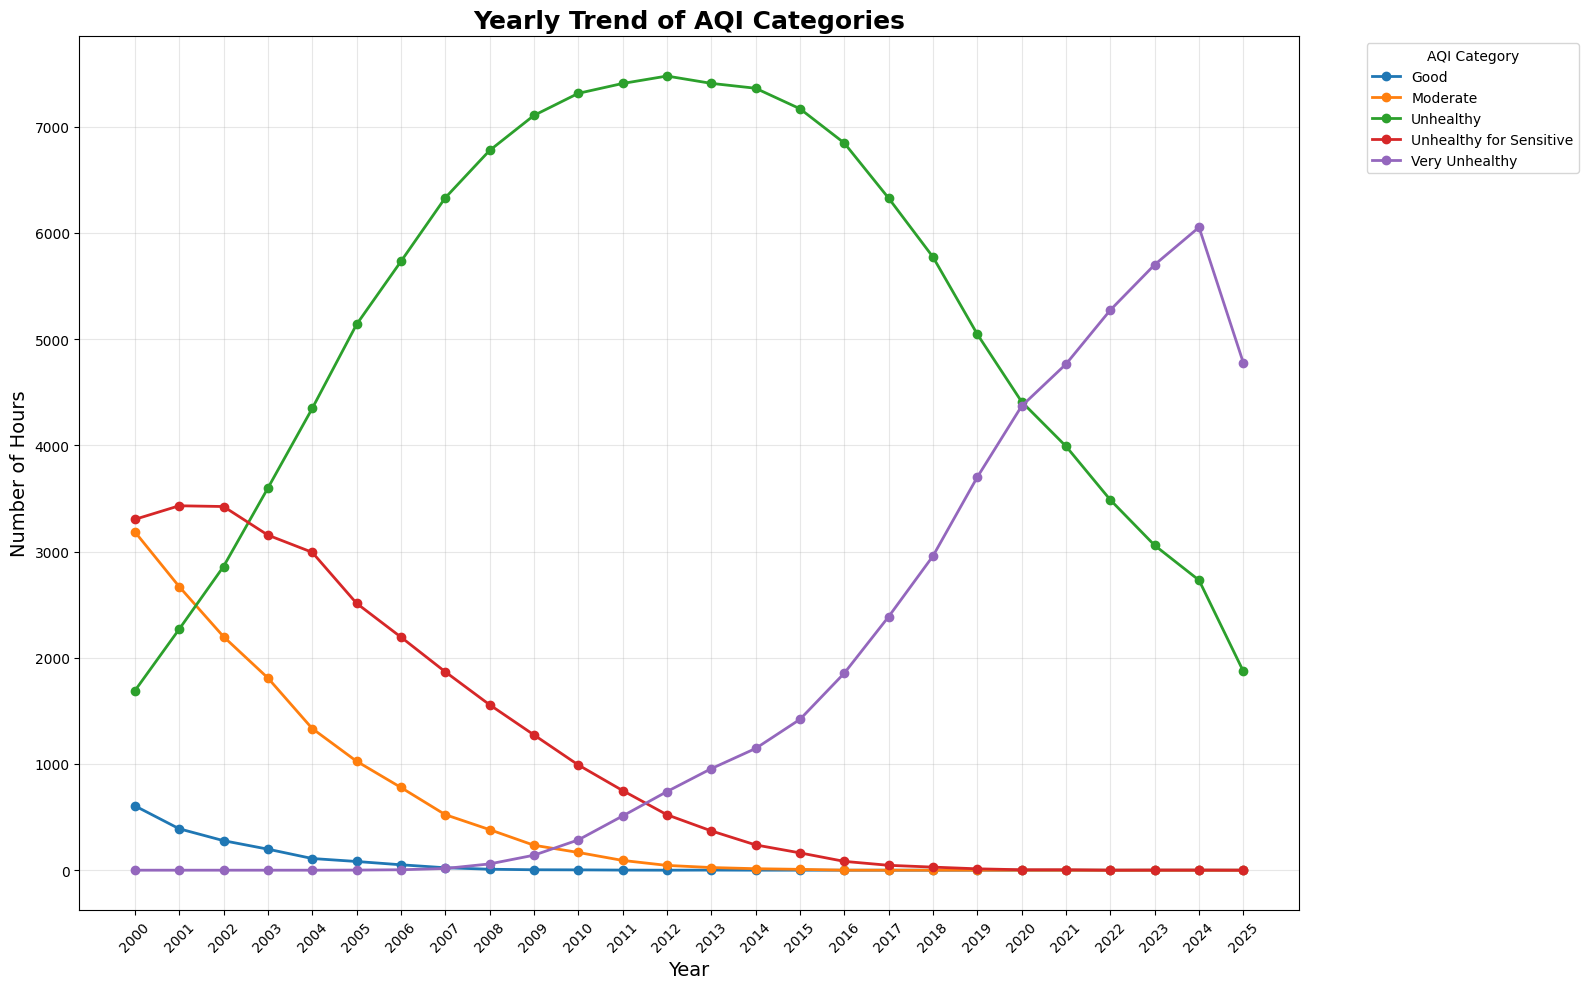

In [13]:
# Pivot so AQI categories become columns
yearlycount_pivot = yearlycount.pivot(index='year', columns='AQI_category', values='count').fillna(0)
print(yearlycount_pivot.head())


plt.figure(figsize=(16,10))

for col in yearlycount_pivot.columns:
    plt.plot(
        yearlycount_pivot.index, 
        yearlycount_pivot[col], 
        marker='o', 
        linewidth=2, 
        label=col
    )

plt.title("Yearly Trend of AQI Categories", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Hours", fontsize=14)
plt.xticks(ticks=yearlycount_pivot.index,labels=yearlycount_pivot.index,rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="AQI Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

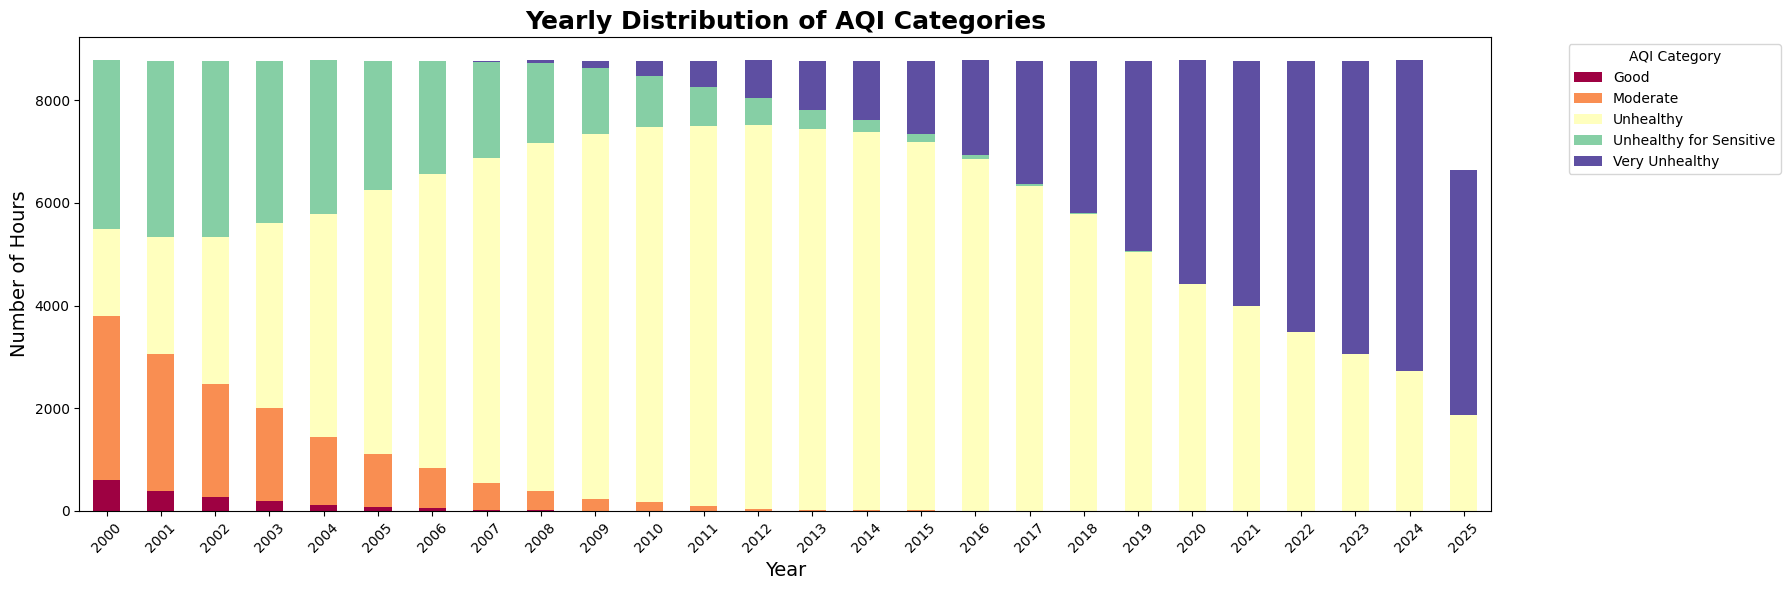

In [14]:
# using chatgpt
# Count of each AQI category per year
yearly_aqi_category = df.groupby(['year','AQI_category']).size().unstack(fill_value=0)
yearly_aqi_category
import matplotlib.pyplot as plt

yearly_aqi_category.plot(
    kind='bar', 
    stacked=True, 
    figsize=(18,6),
    colormap='Spectral'  # colorful and attractive
)

plt.title("Yearly Distribution of AQI Categories", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Hours", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="AQI Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Monthly analysis of AQI 

In [15]:
# lets make a month columns 
df["month"] = df["datetime"].dt.month
df["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

Year: 2000


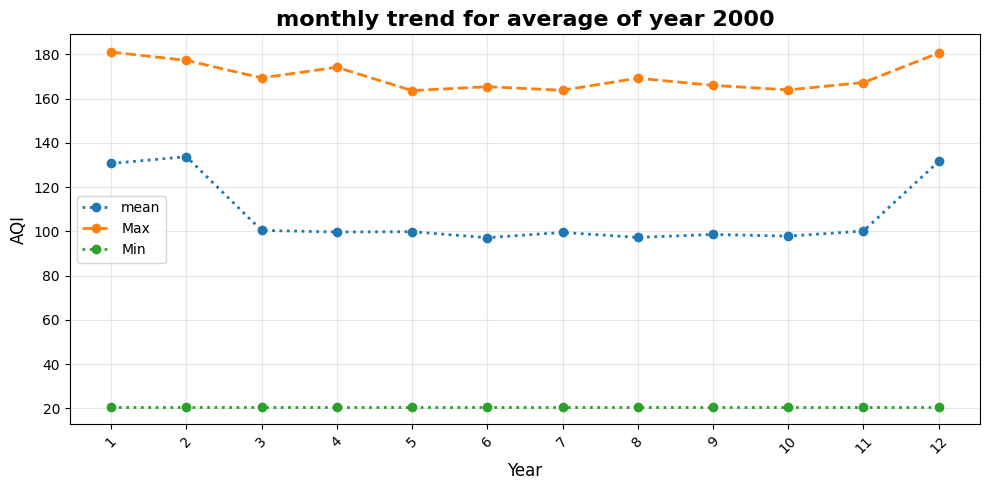

Year: 2001


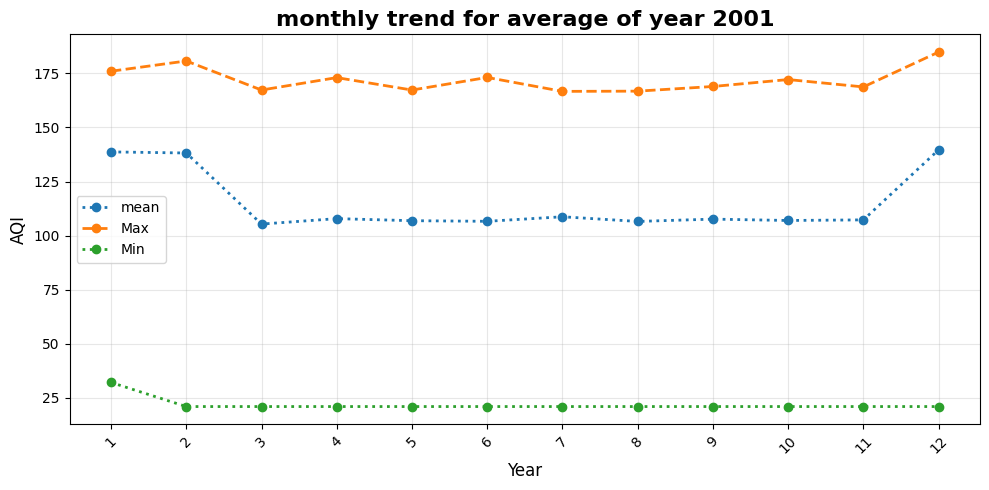

Year: 2002


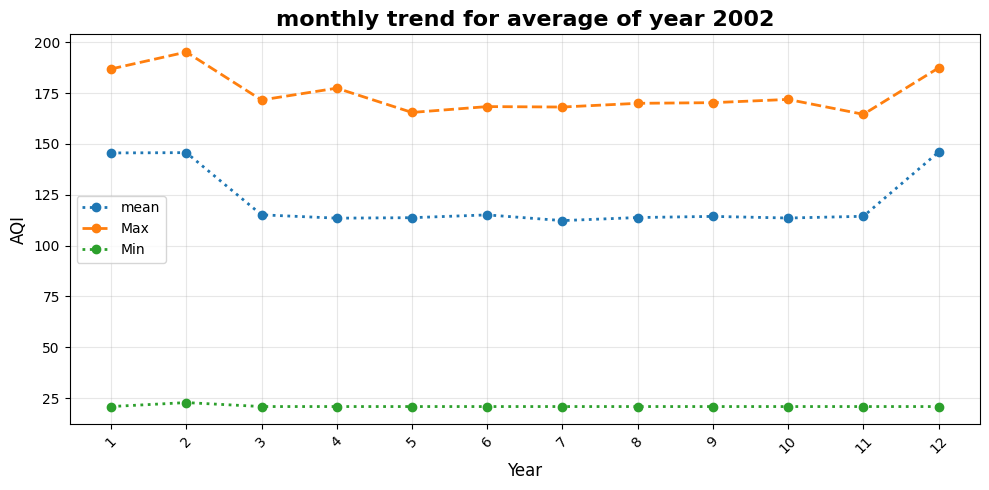

Year: 2003


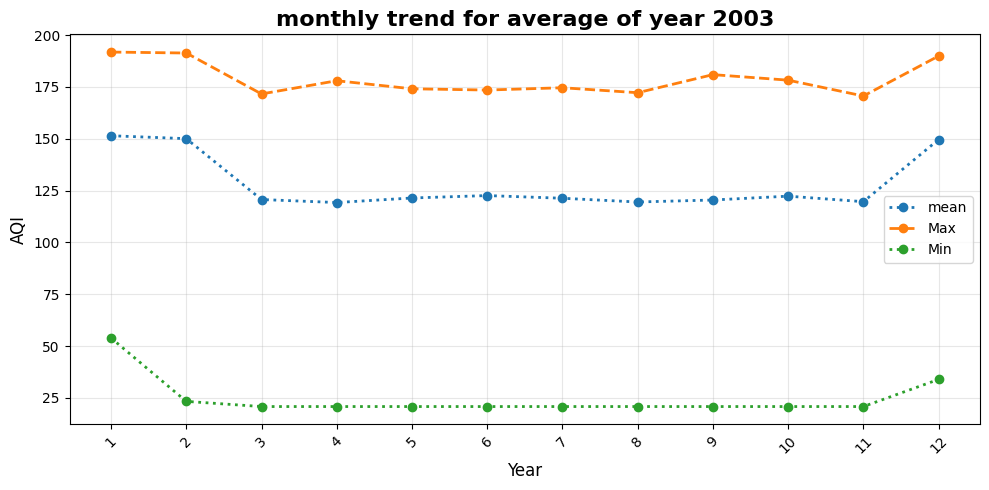

Year: 2004


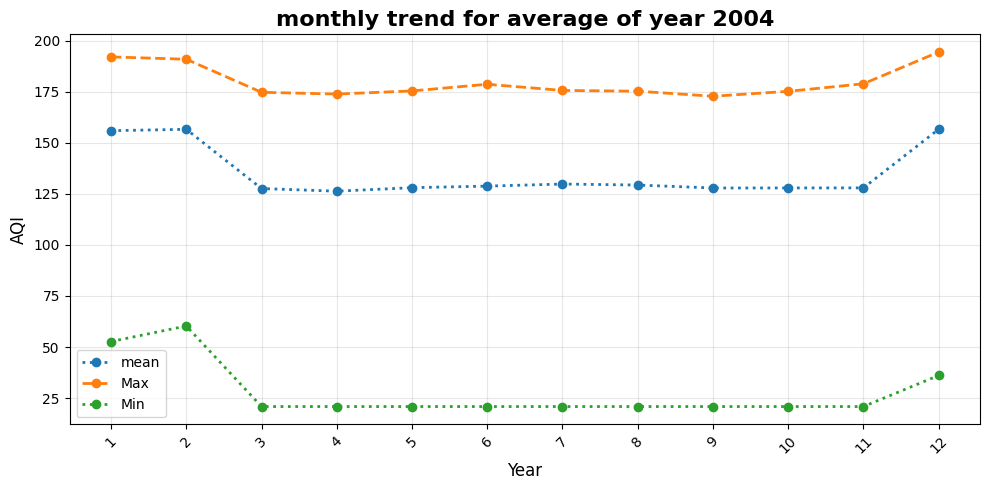

Year: 2005


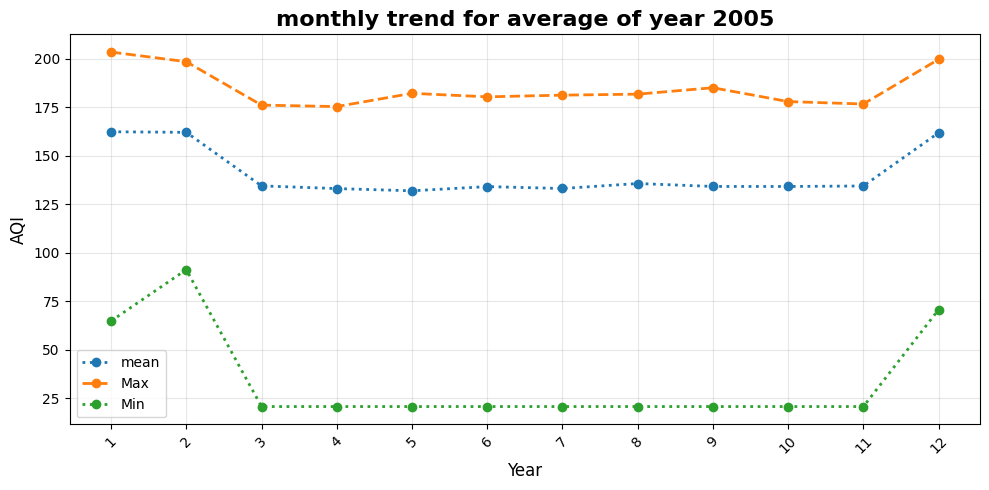

Year: 2006


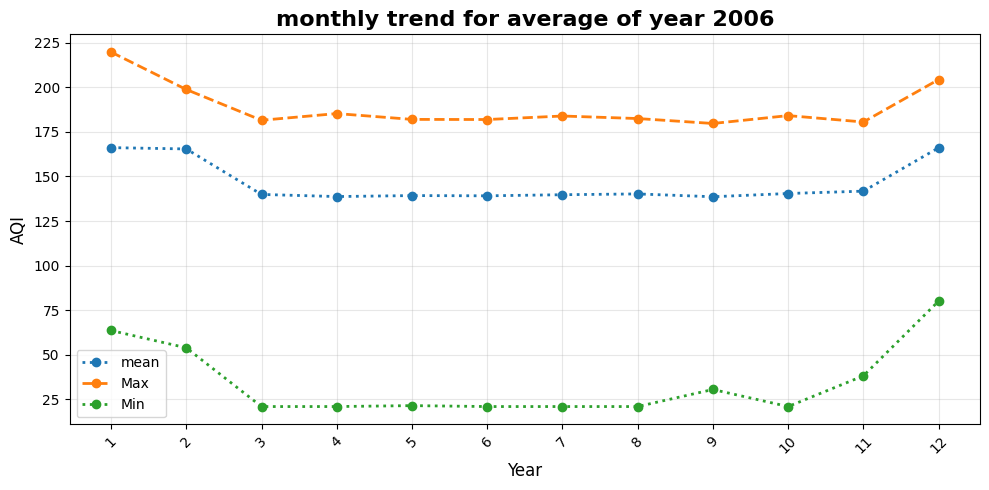

Year: 2007


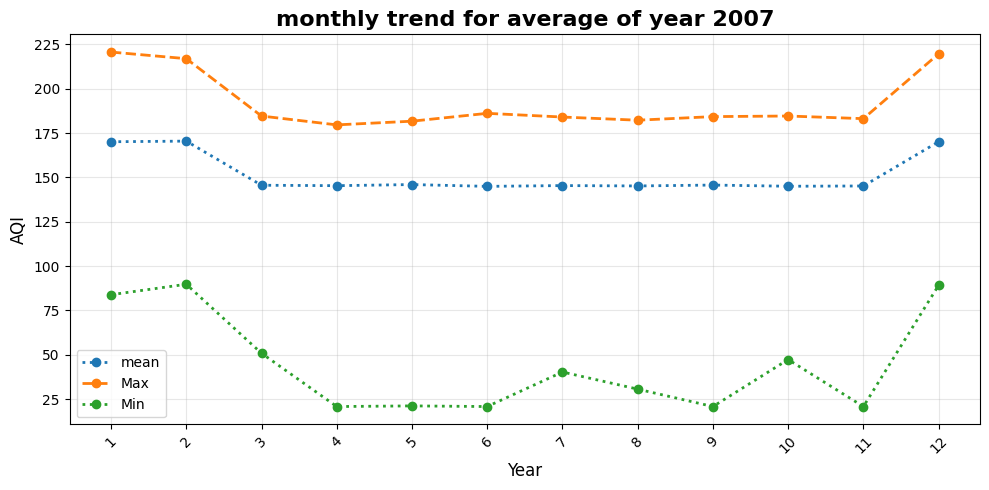

Year: 2008


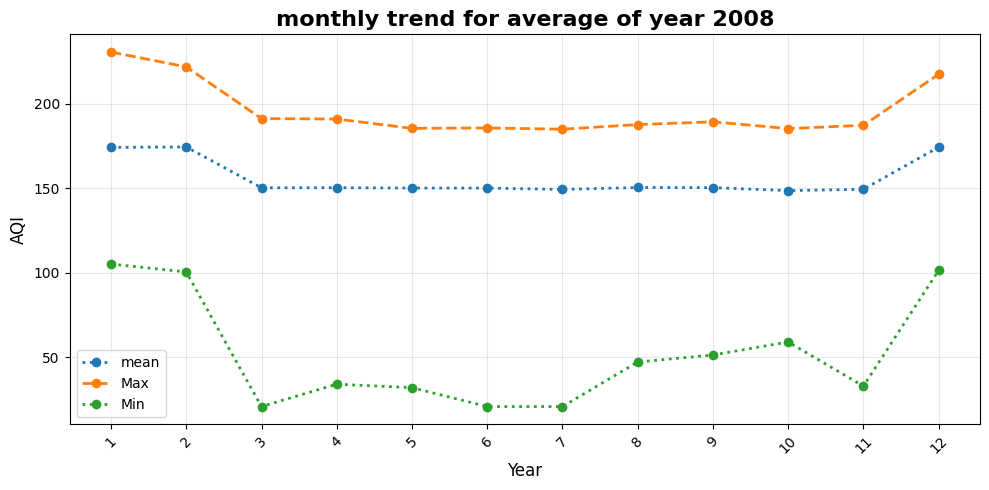

Year: 2009


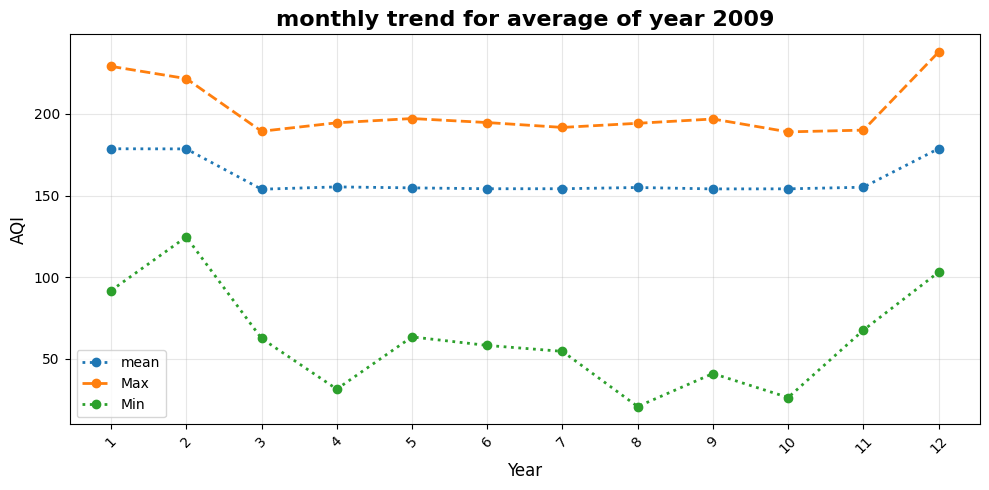

Year: 2010


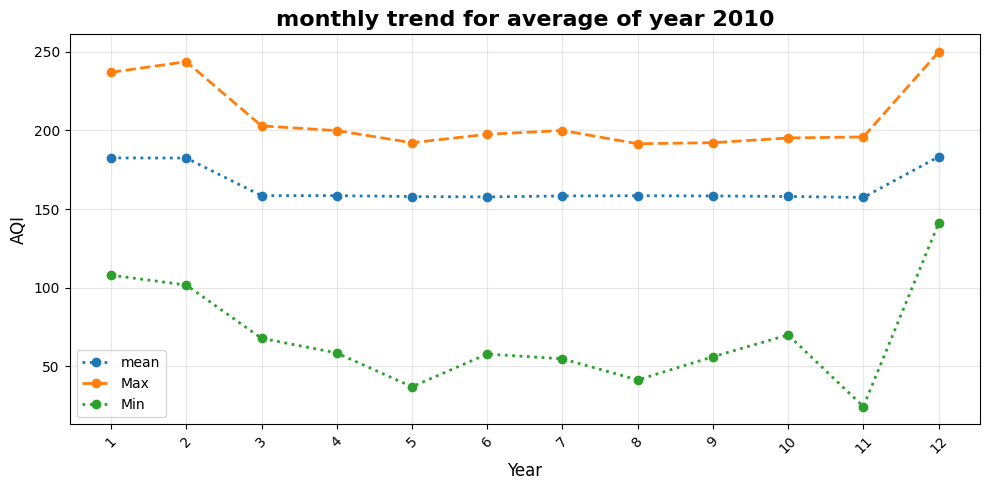

Year: 2011


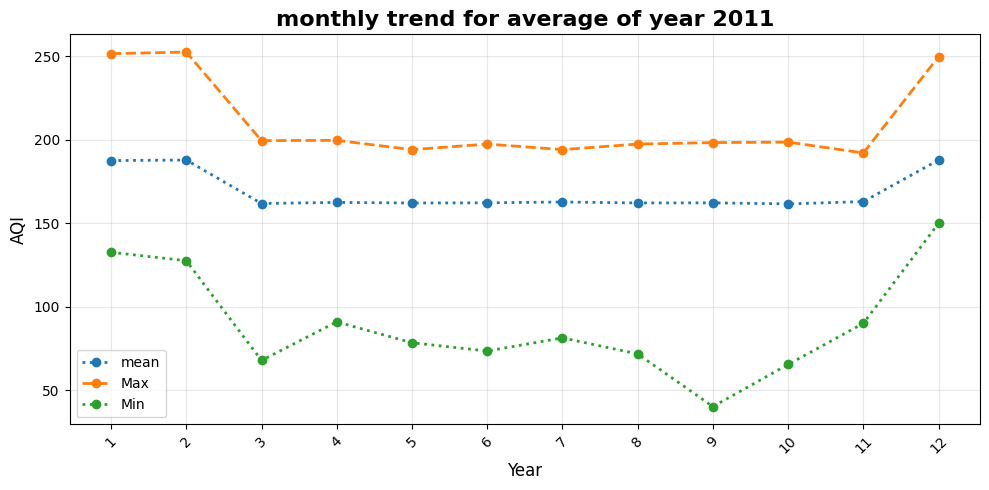

Year: 2012


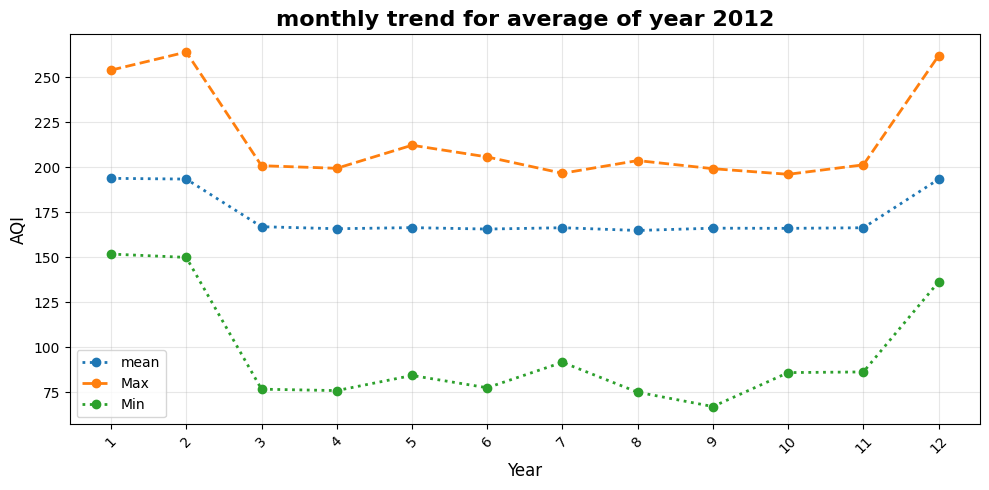

Year: 2013


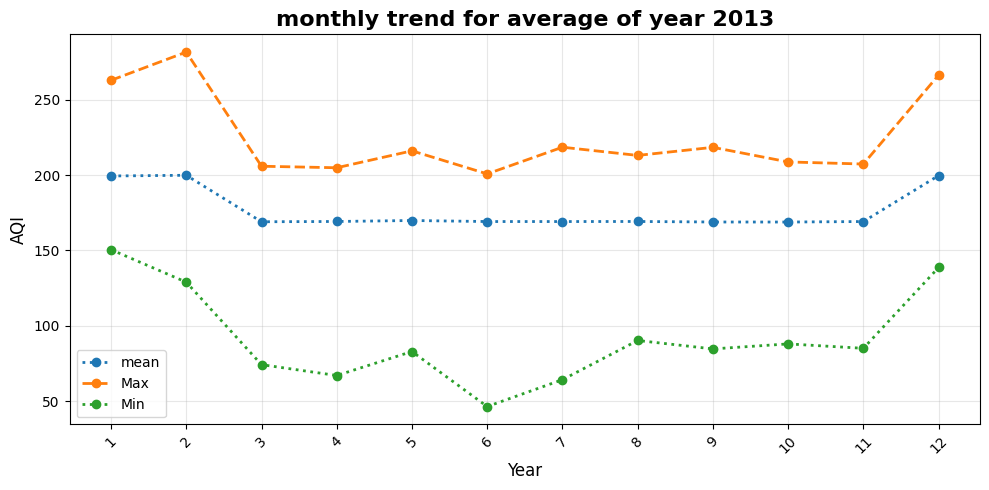

Year: 2014


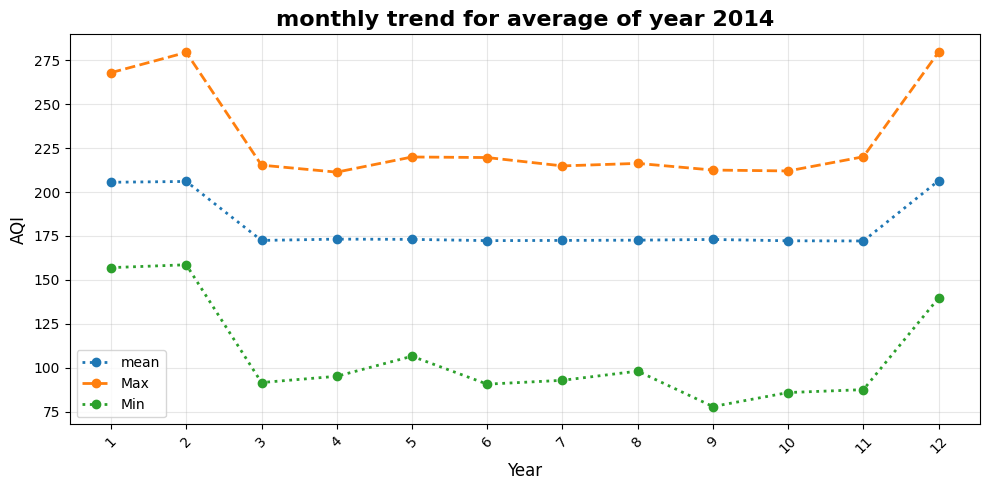

Year: 2015


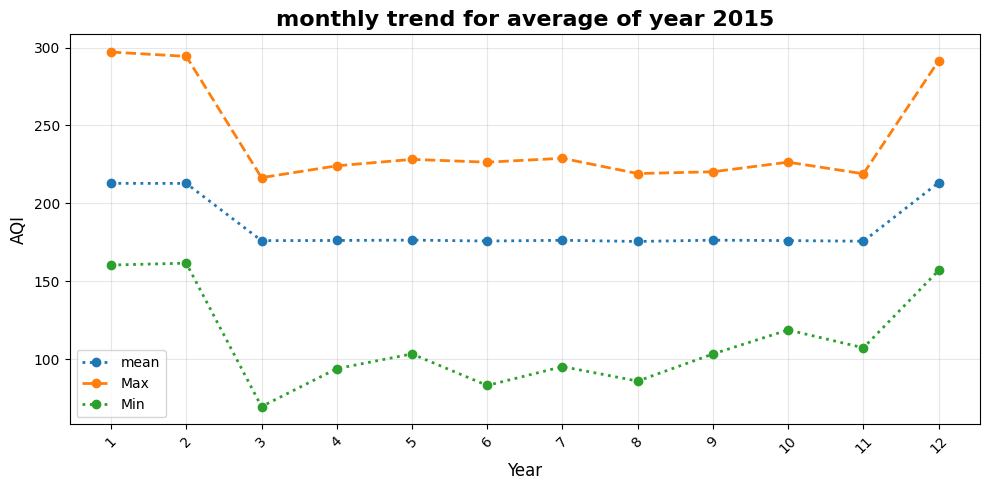

Year: 2016


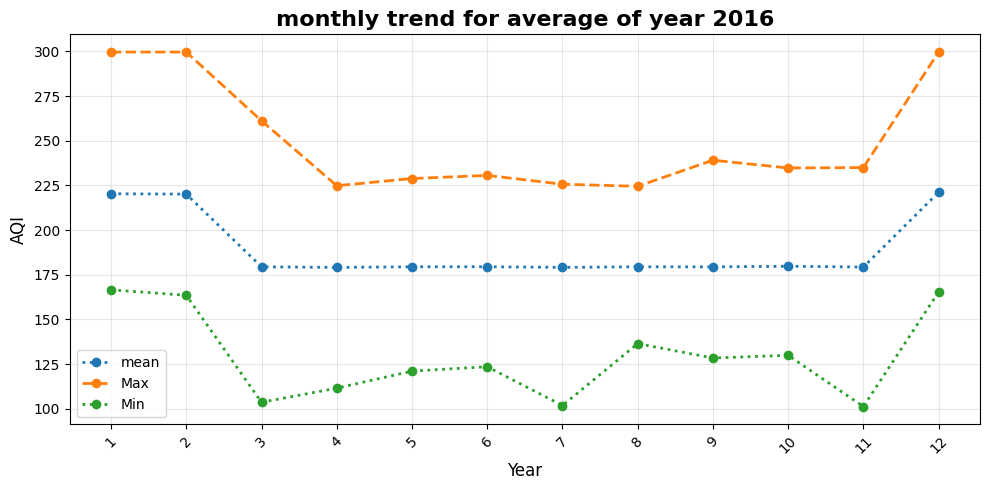

Year: 2017


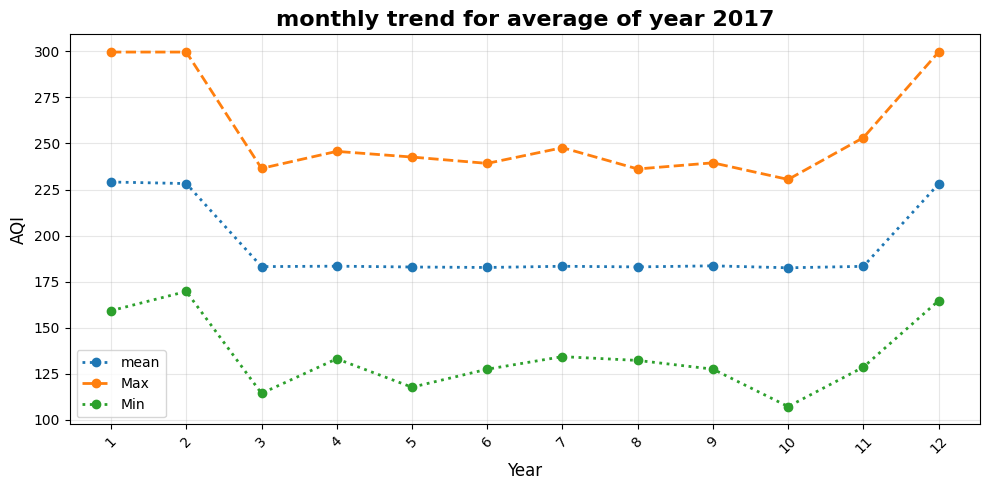

Year: 2018


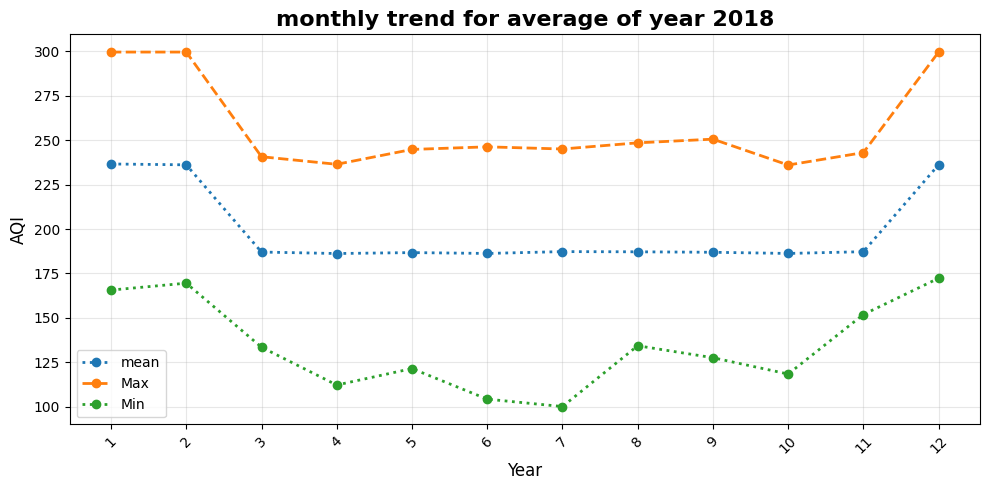

Year: 2019


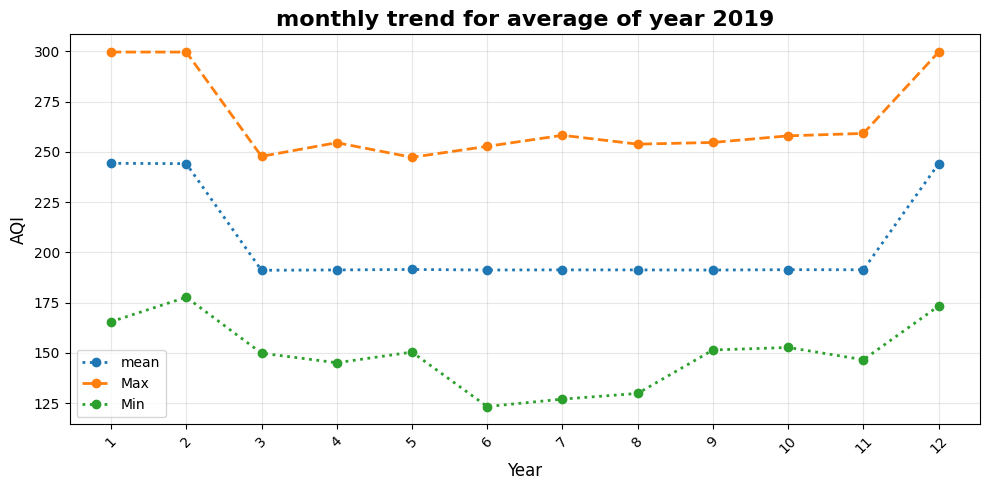

Year: 2020


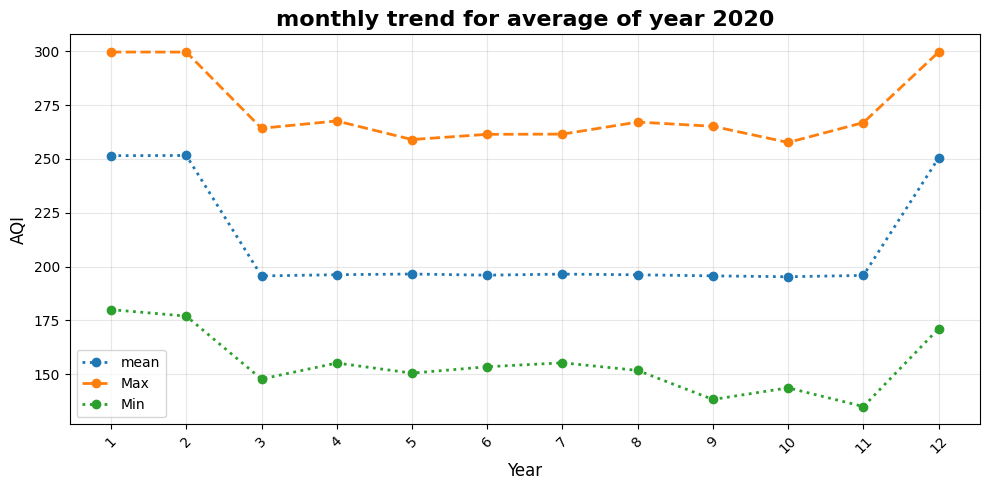

Year: 2021


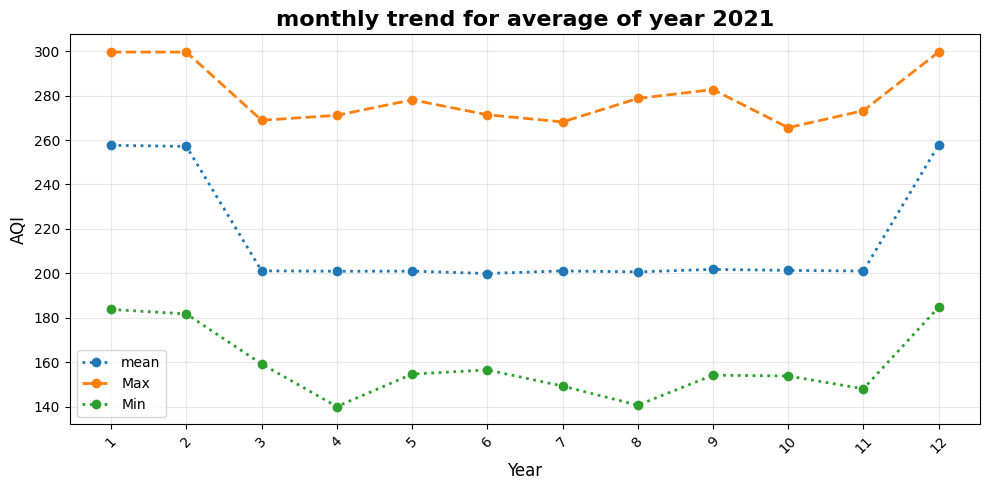

Year: 2022


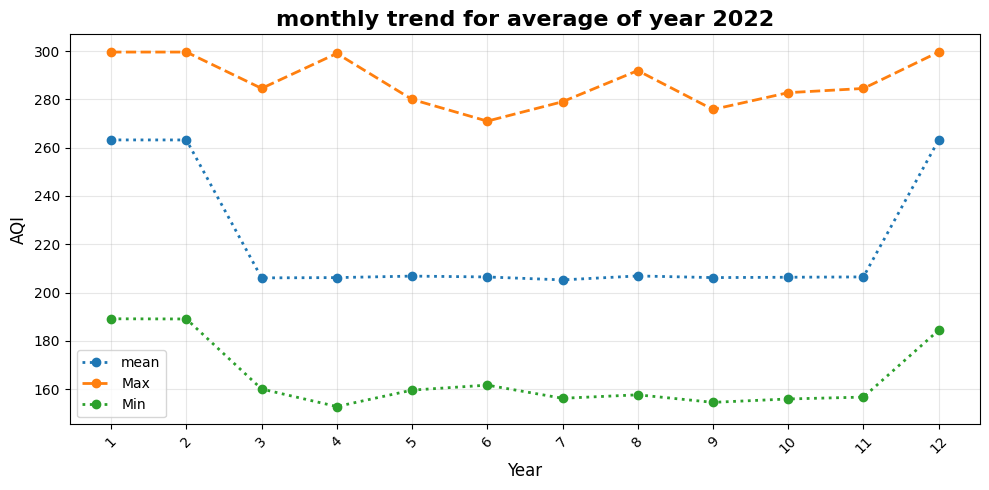

Year: 2023


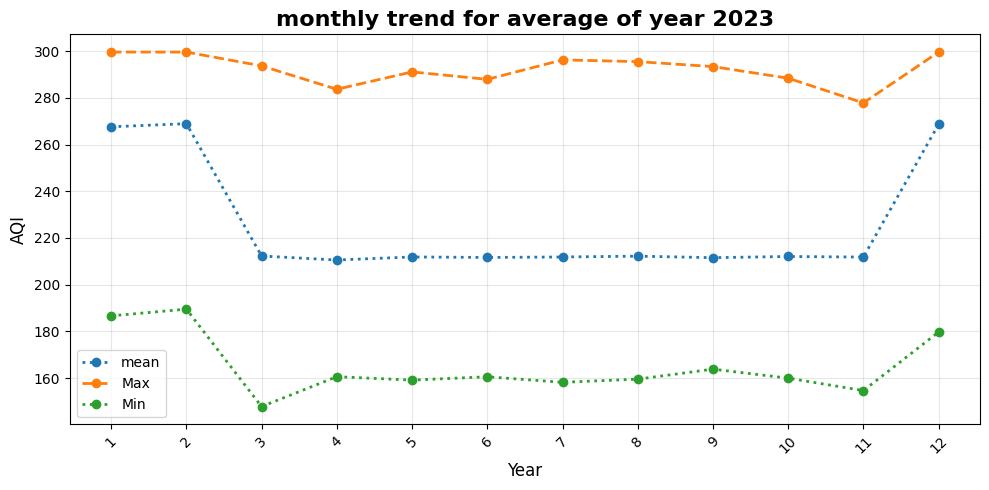

Year: 2024


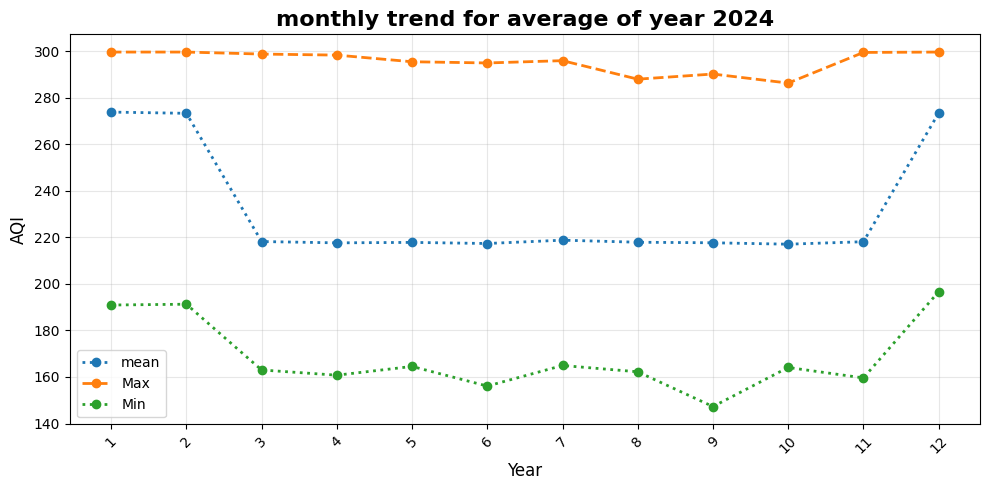

Year: 2025


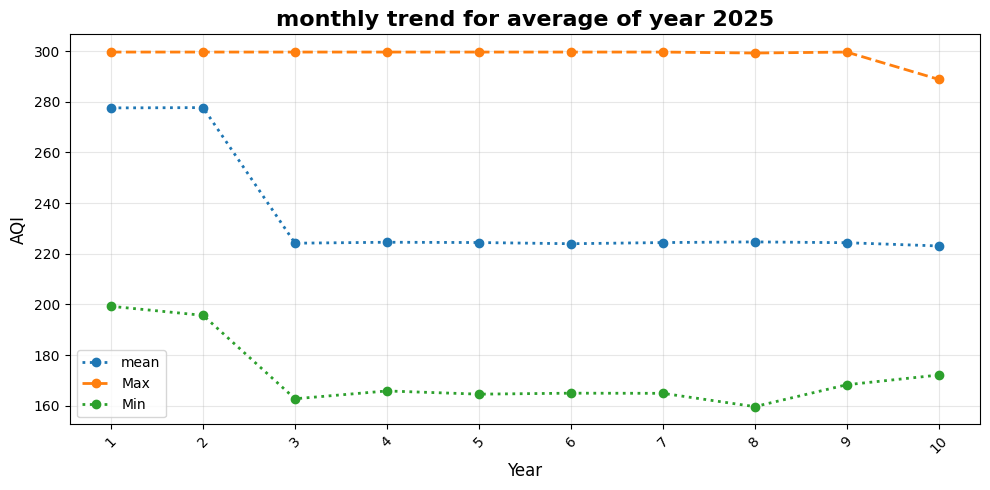

In [16]:
# lets analysise month wise AQI for every year
for year in df["year"].unique():
    print(f"Year: {year}")
    
    # Filter data for the year
    data_year = df[df["year"] == year]
    
    # Calculate average AQI for each month
    monthly_avg_aqi = data_year.groupby("month")["AQI"].mean()
    monthly_max_aqi = data_year.groupby("month")["AQI"].max()
    monthly_min_aqi = data_year.groupby("month")["AQI"].min()
    
    

    # lets plot for months 
    plt.figure(figsize=(10,5))
    plt.plot(monthly_avg_aqi.index, monthly_avg_aqi.values, marker='o', linewidth=2, linestyle=':',label='mean')
    plt.plot(monthly_max_aqi.index, monthly_max_aqi.values, marker='o', linewidth=2, linestyle='--', label='Max')
    plt.plot(monthly_min_aqi.index, monthly_min_aqi.values, marker='o', linewidth=2, linestyle=':', label='Min')

    plt.title(f"monthly trend for average of year {year}", fontsize=16, fontweight='bold')
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("AQI", fontsize=12)
    plt.xticks(ticks=monthly_avg_aqi.index, labels=monthly_avg_aqi.index, rotation=45)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Period of Time analysis of a day

In [17]:
# lets create the hour 
df["hour"] = df["datetime"].dt.hour
df["hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [18]:
# categorise hours 
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"


In [19]:
df["time_of_day"] = df["hour"].apply(time_of_day)
df[["hour", "time_of_day"]].head(10)


hour time_of_day
0     0       Night
1     1       Night
2     2       Night
3     3       Night
4     4       Night
5     5     Morning
6     6     Morning
7     7     Morning
8     8     Morning
9     9     Morning

In [20]:
monthly_hour_aqi = df.groupby(['year','month','time_of_day'])['AQI'].mean().reset_index()
monthly_hour_aqi.head()

year  month time_of_day         AQI
0  2000      1   Afternoon  148.483083
1  2000      1     Evening  133.952260
2  2000      1     Morning  143.997845
3  2000      1       Night  106.336365
4  2000      2   Afternoon  153.787722

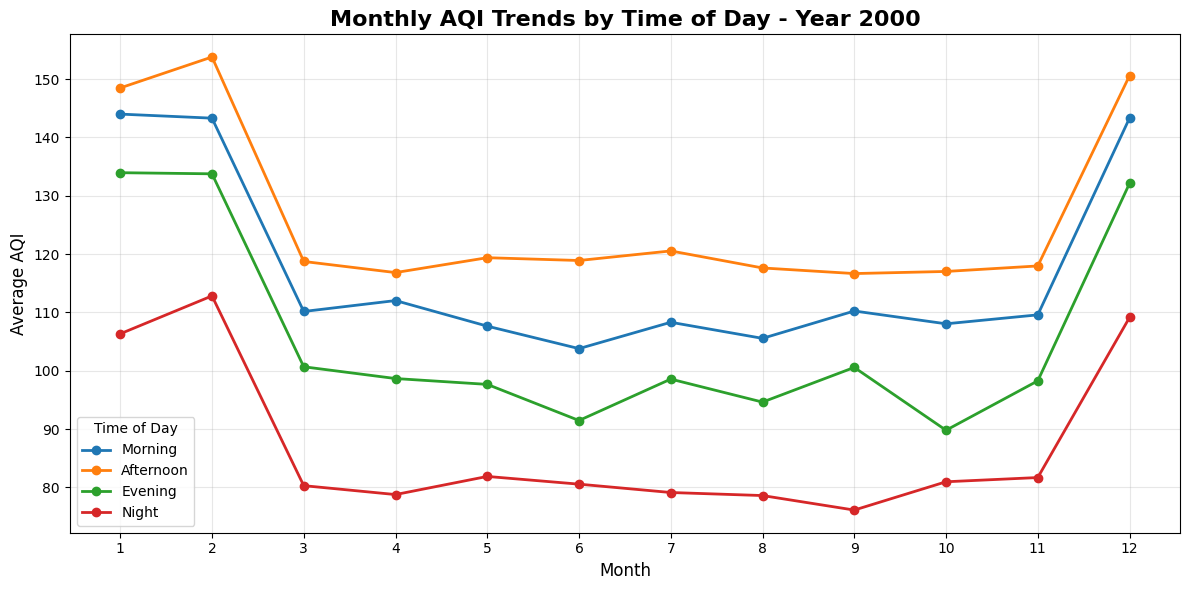

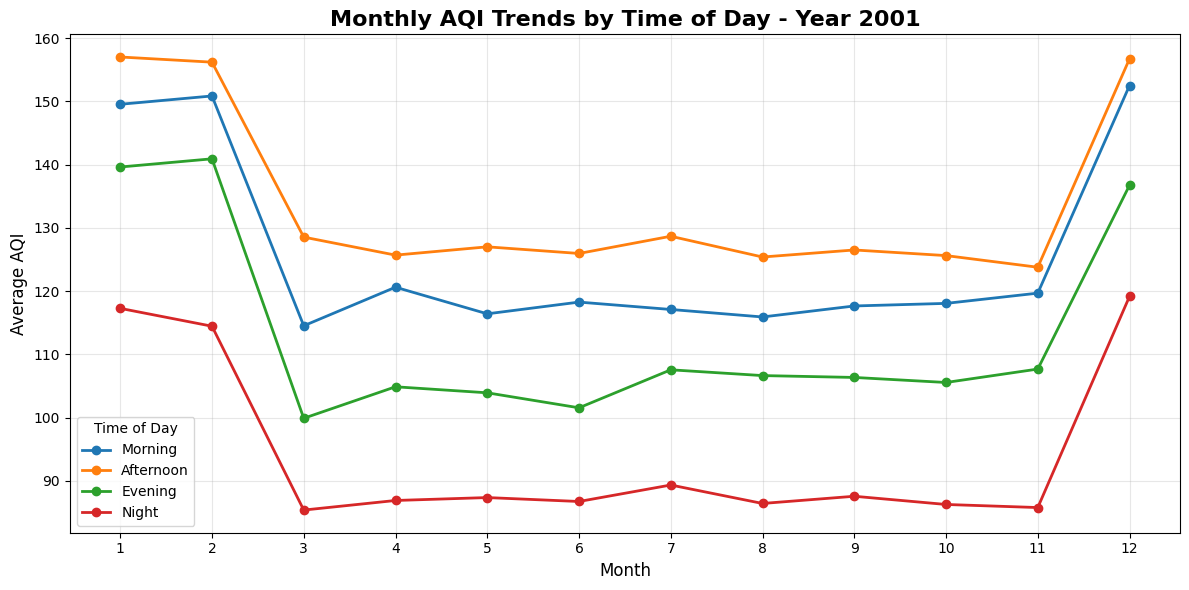

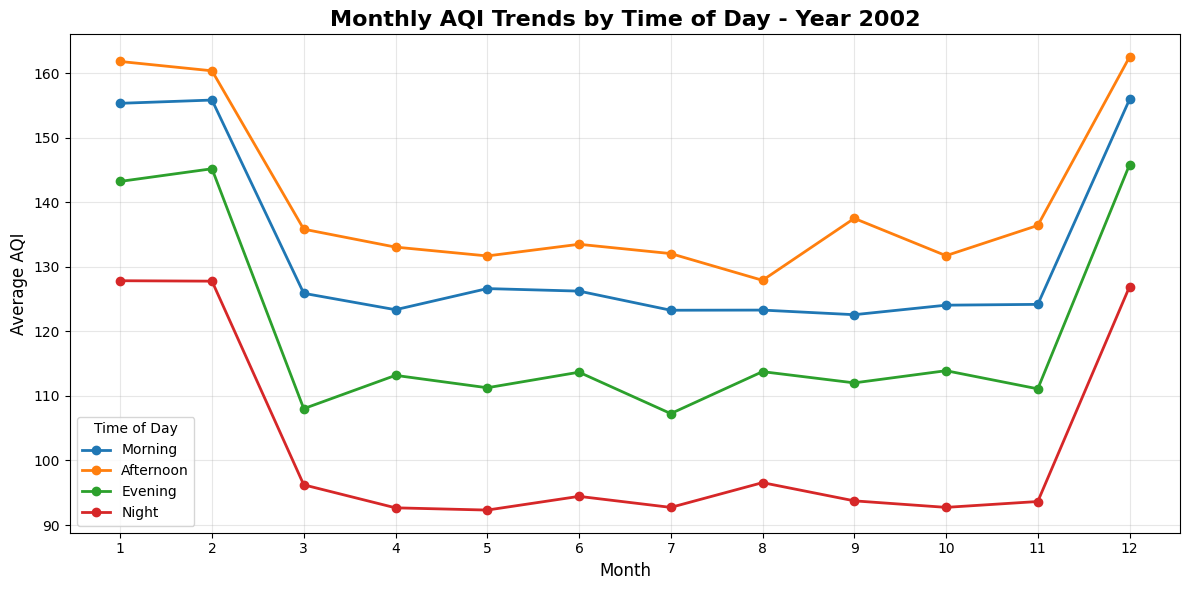

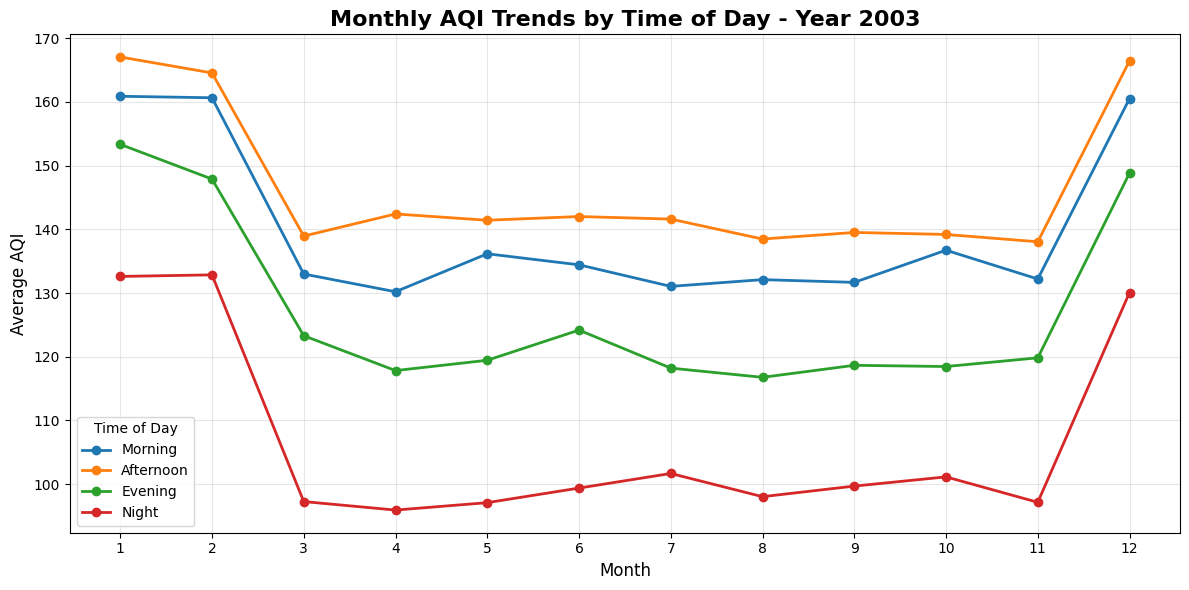

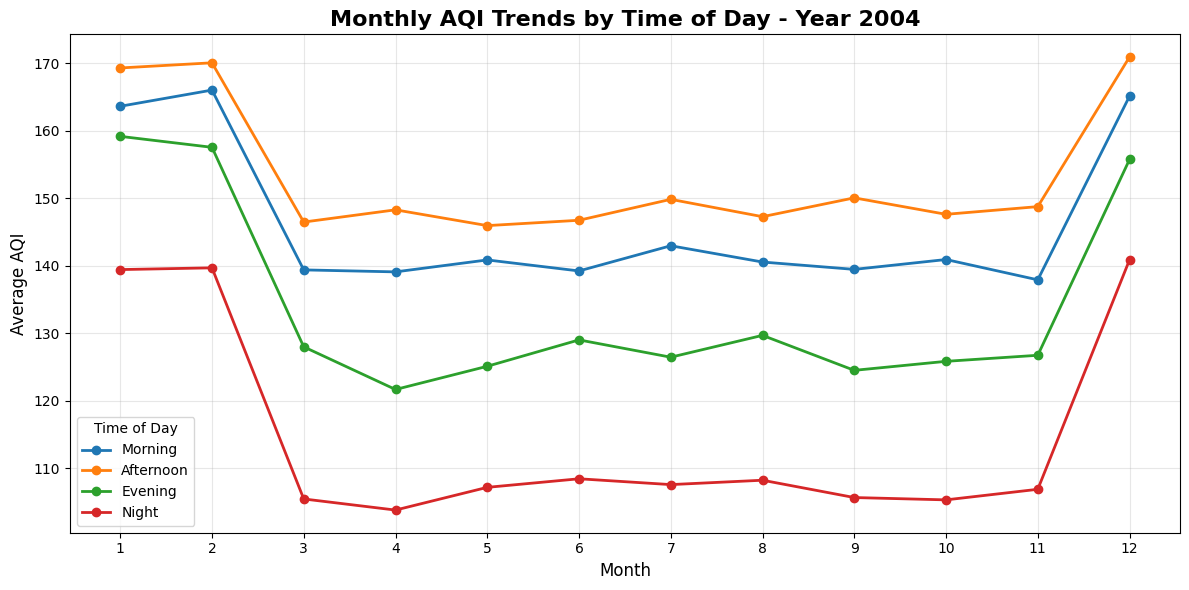

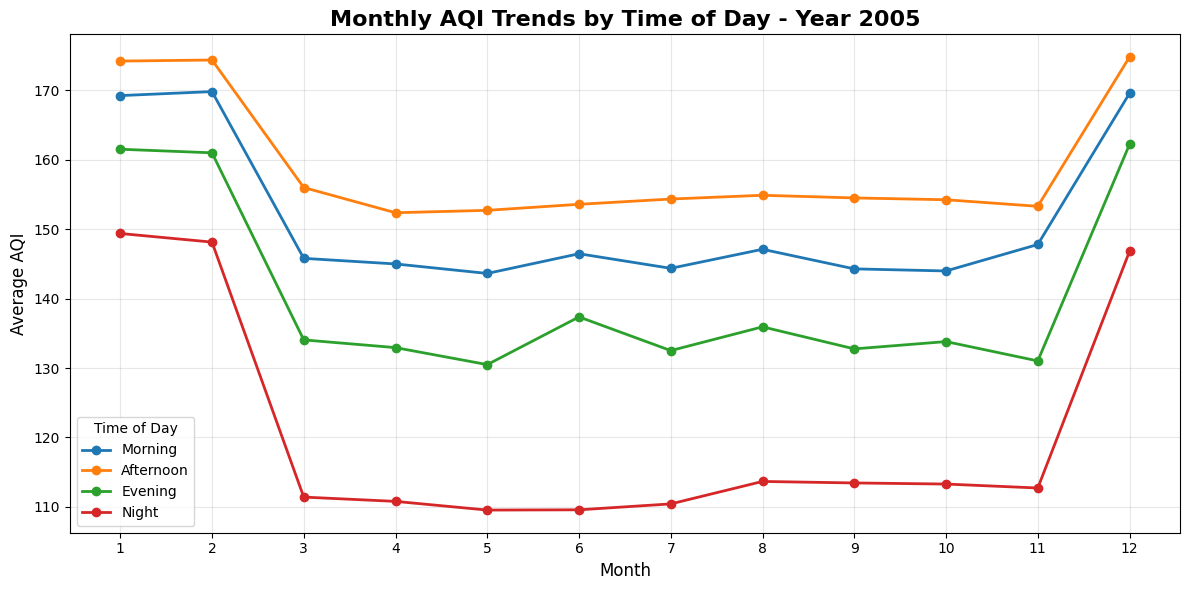

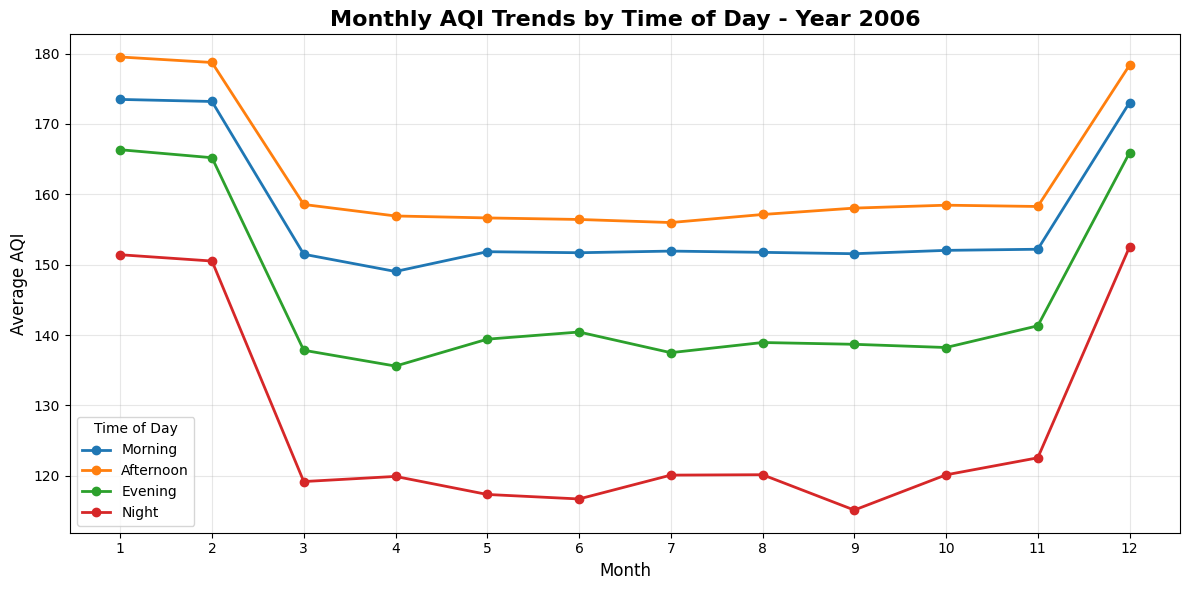

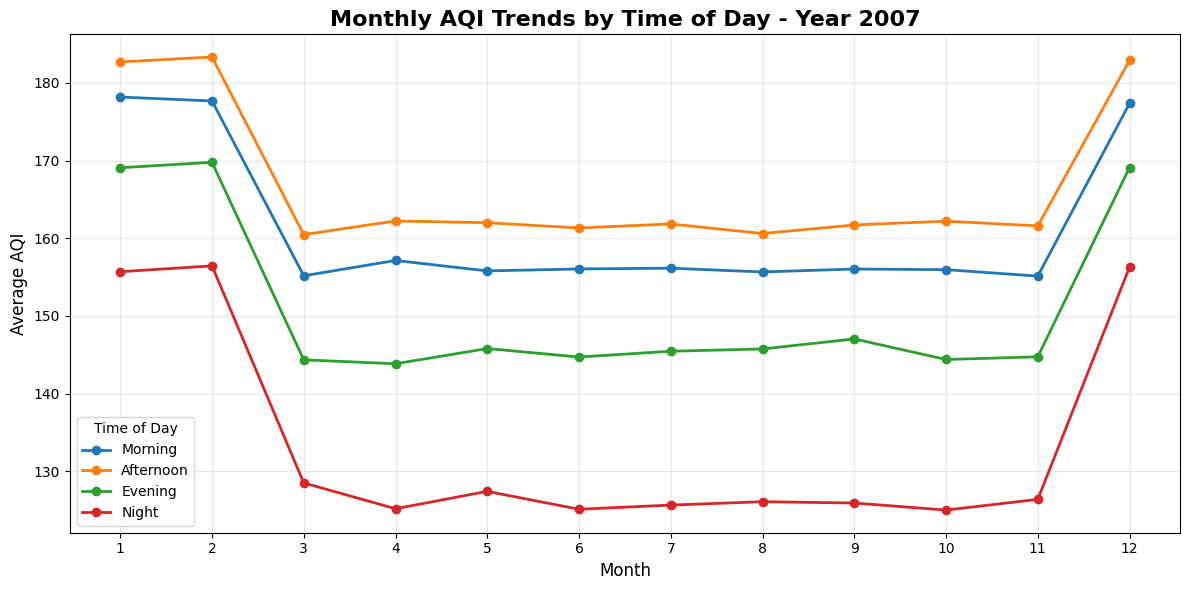

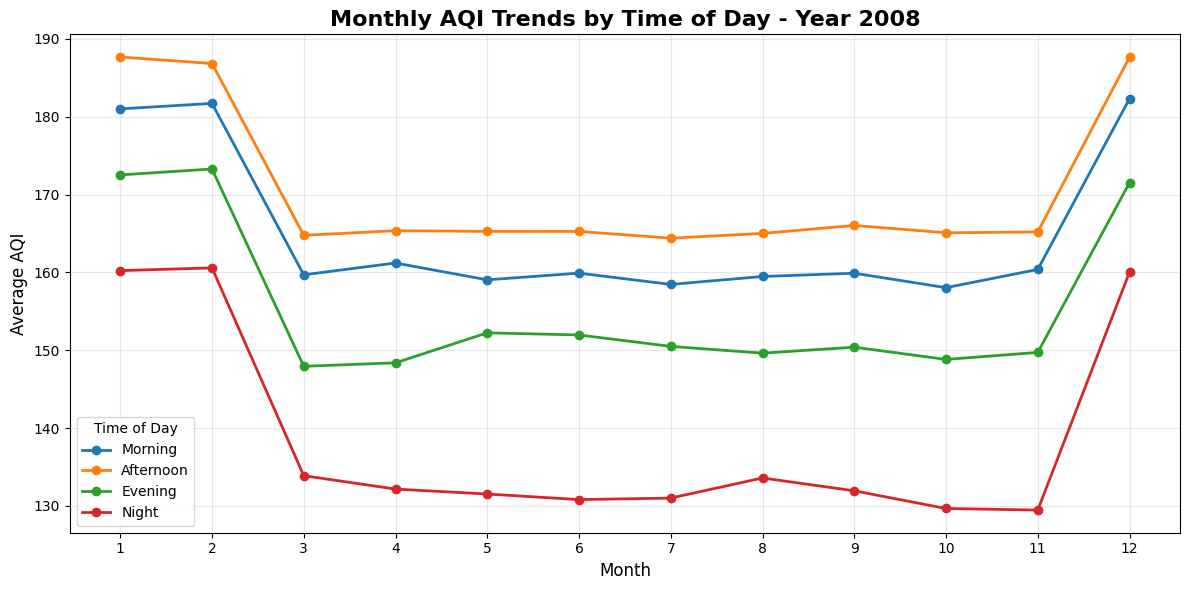

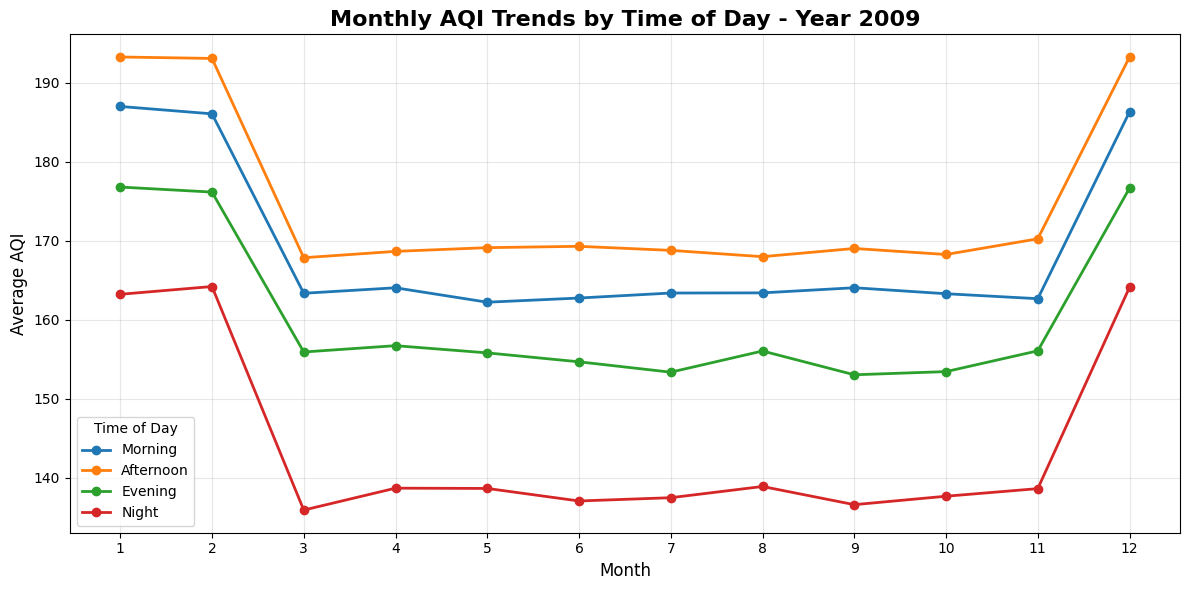

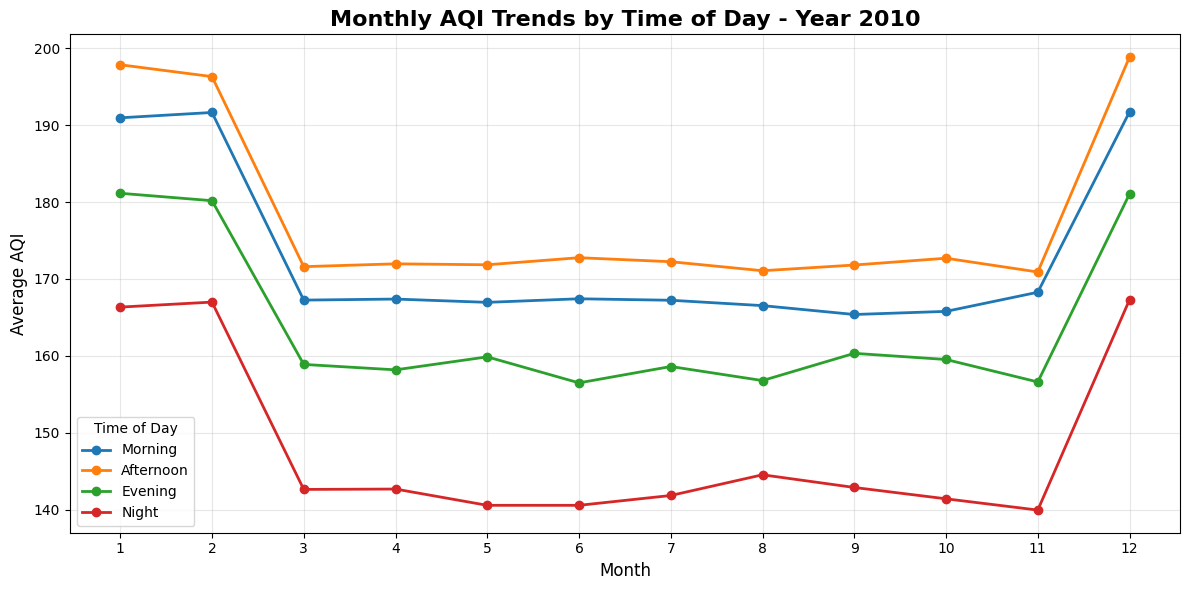

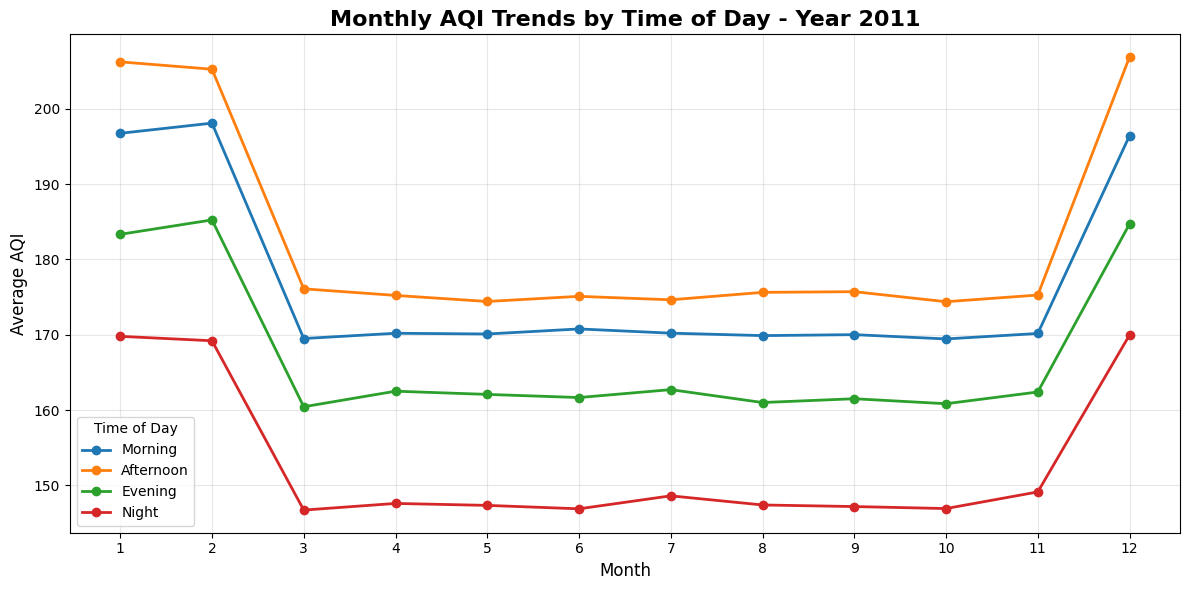

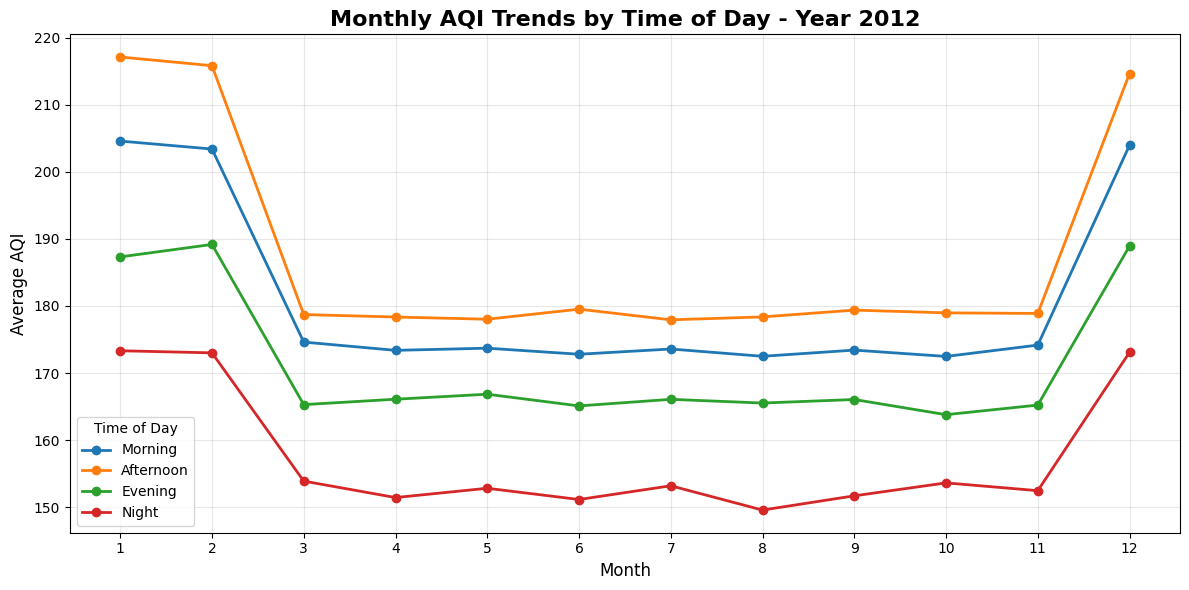

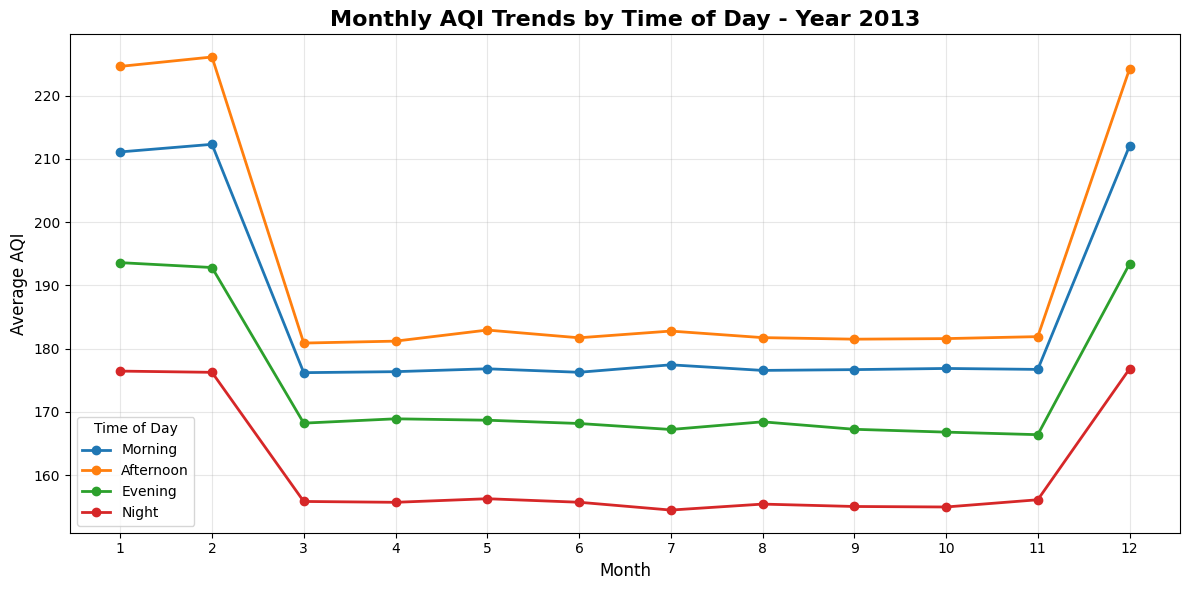

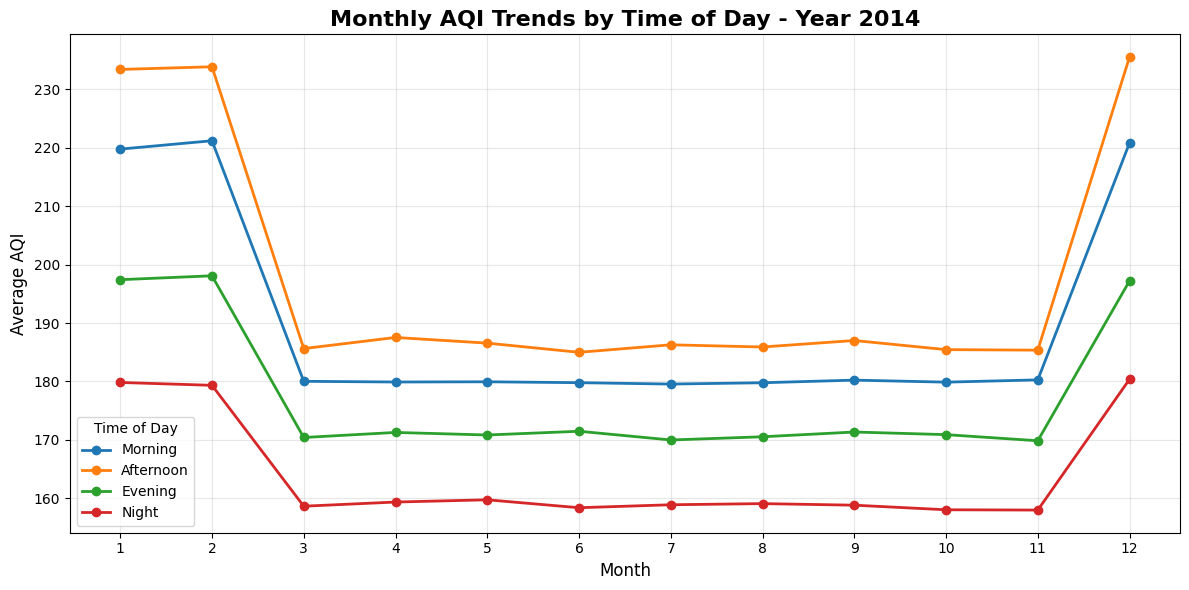

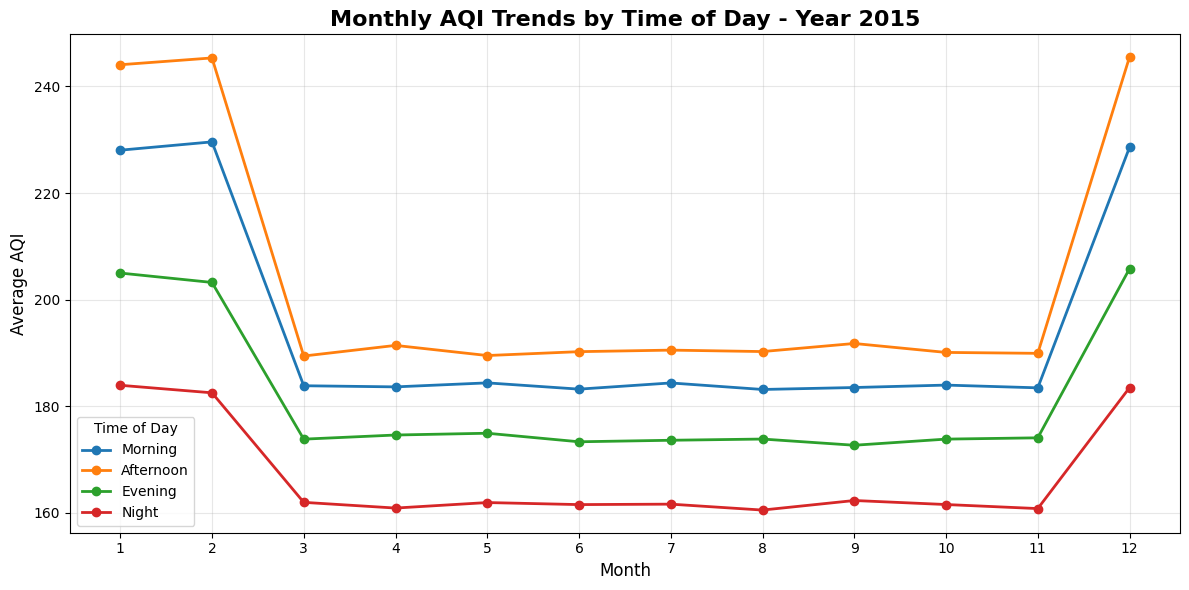

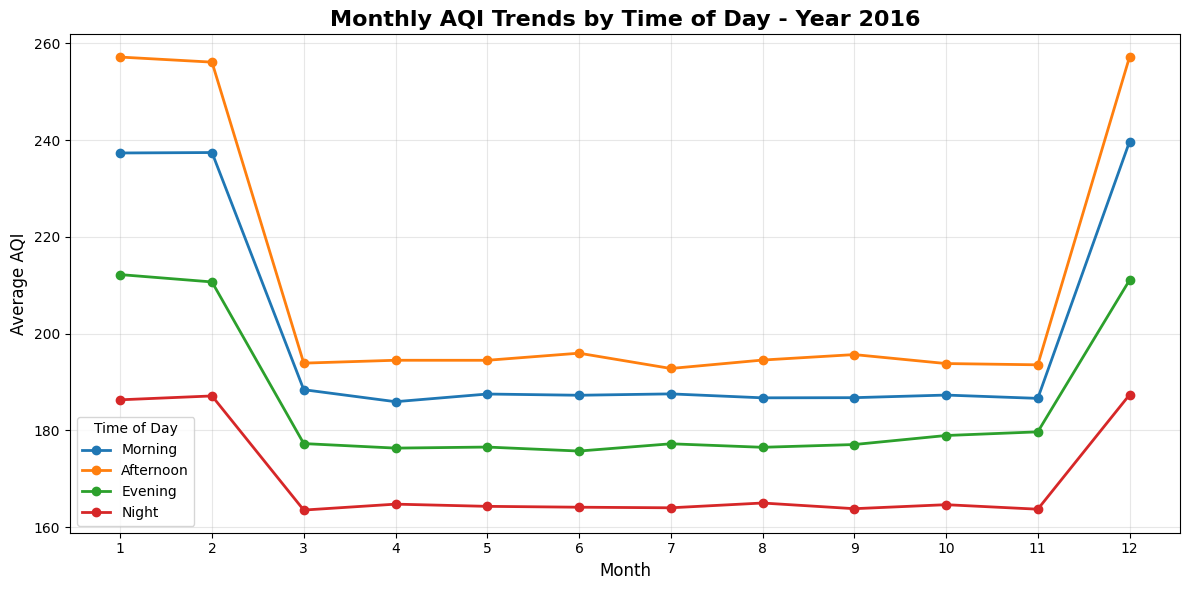

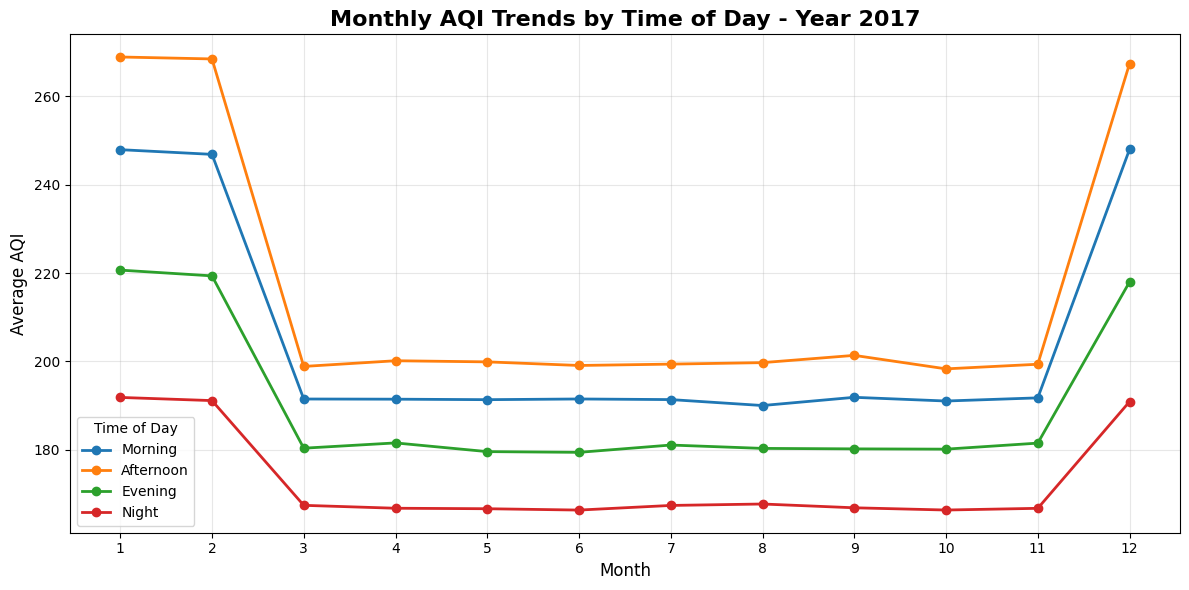

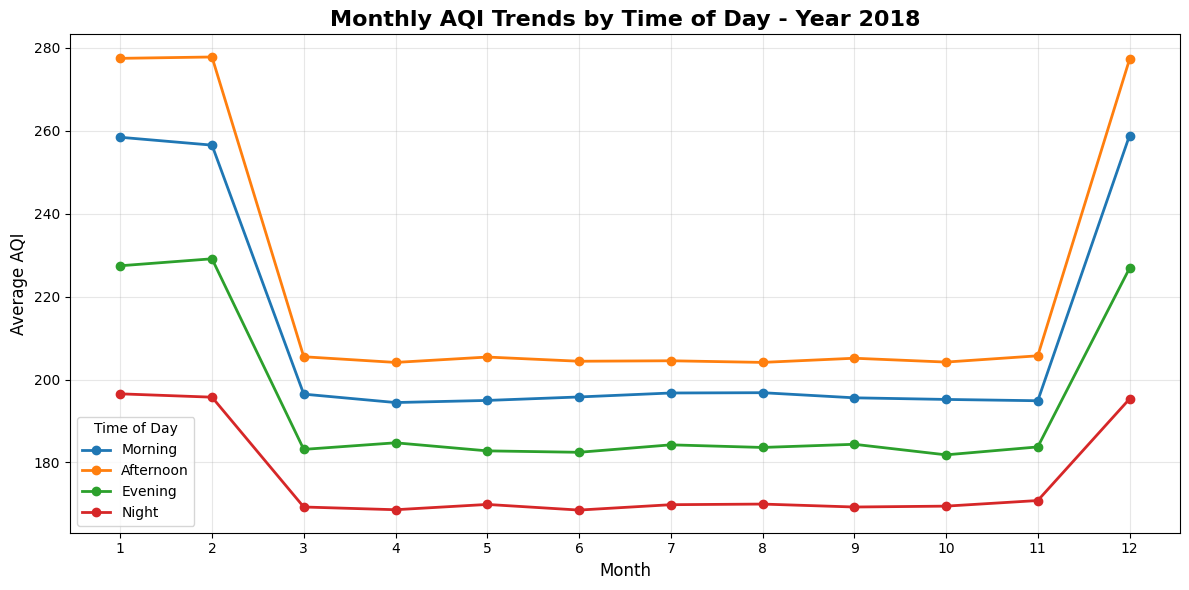

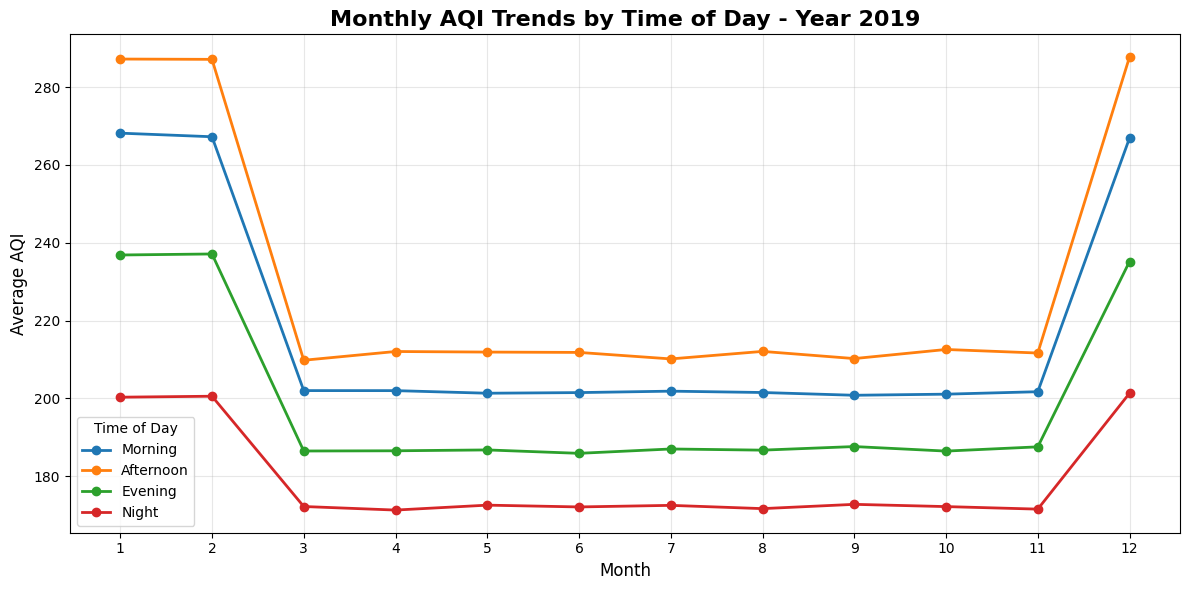

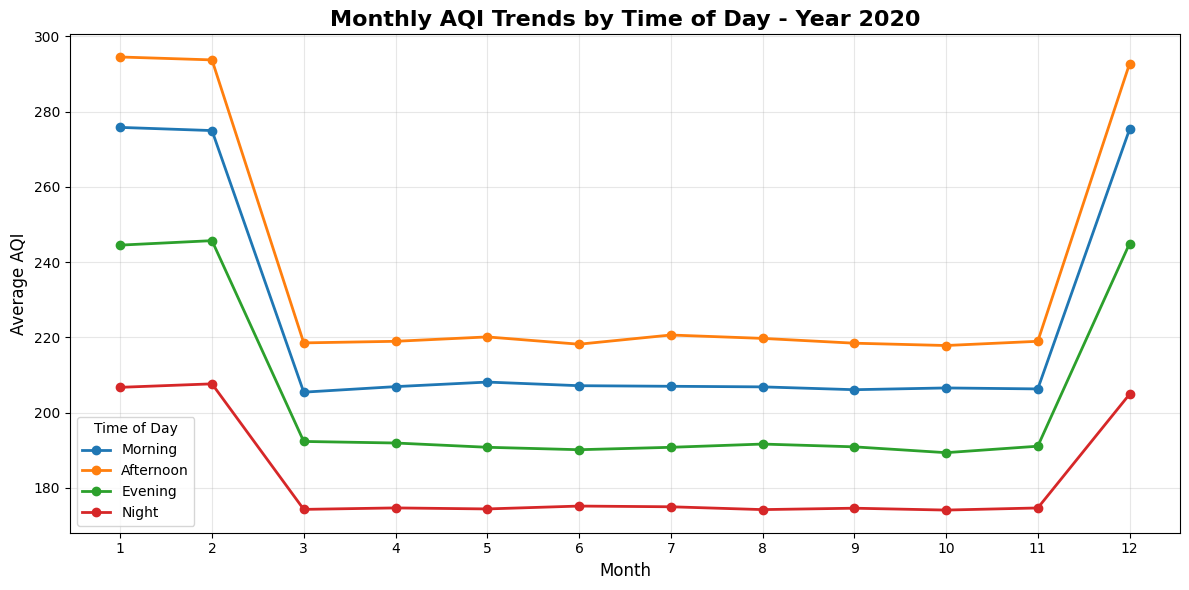

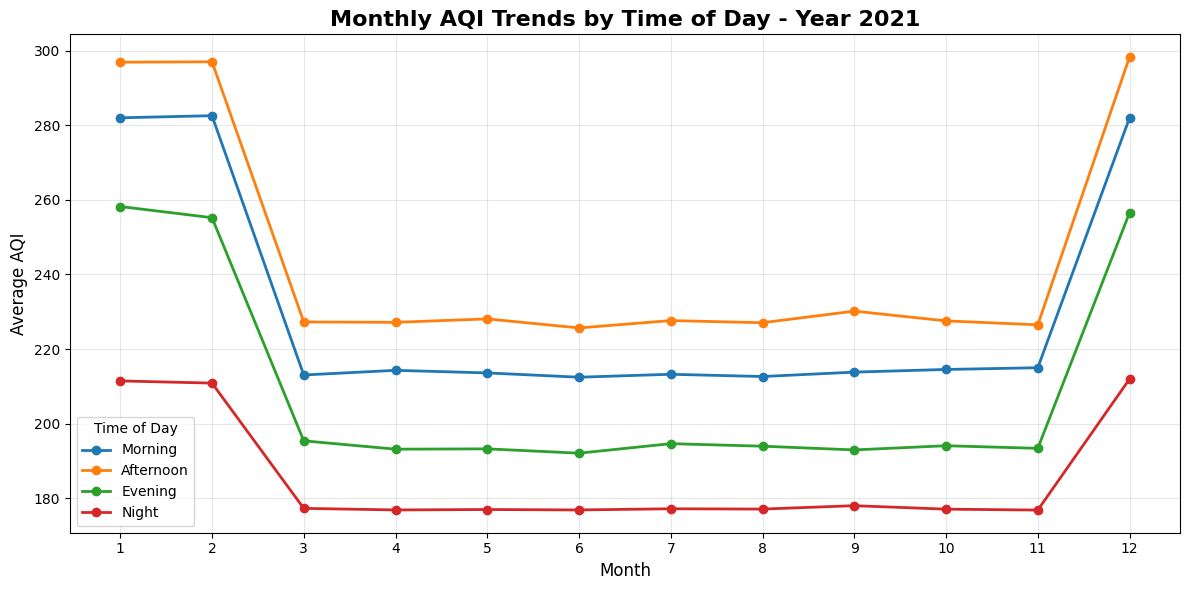

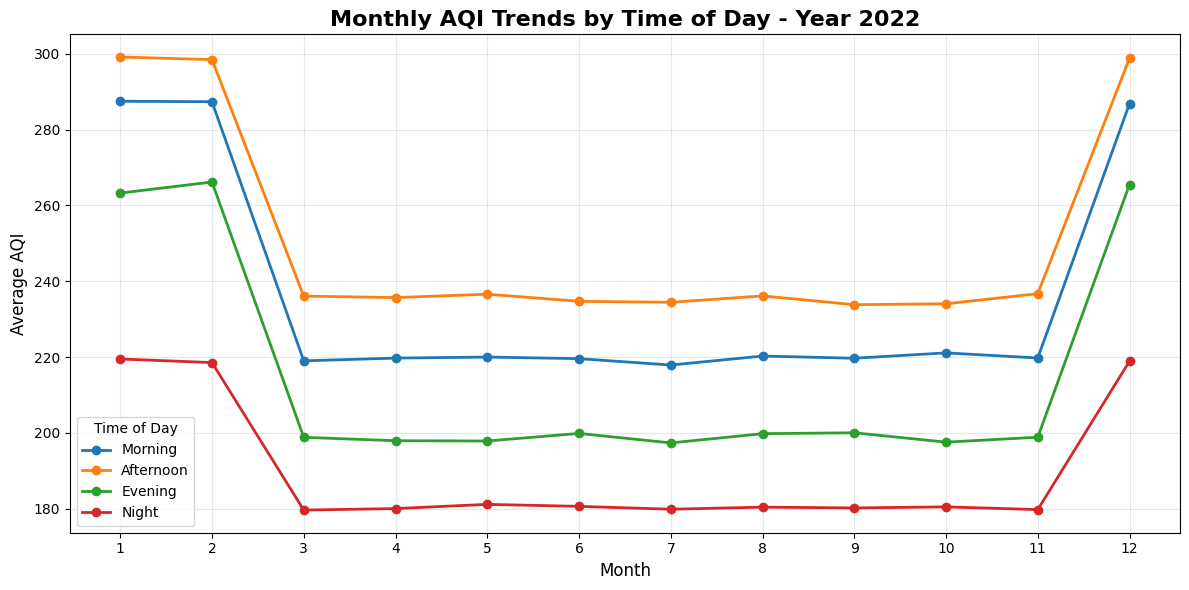

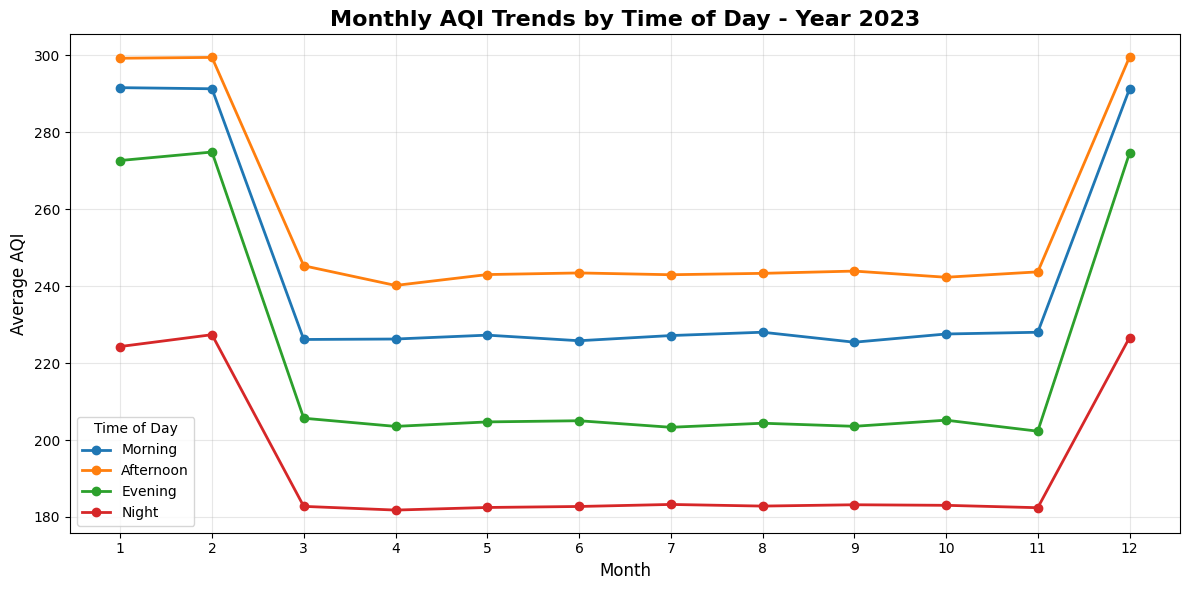

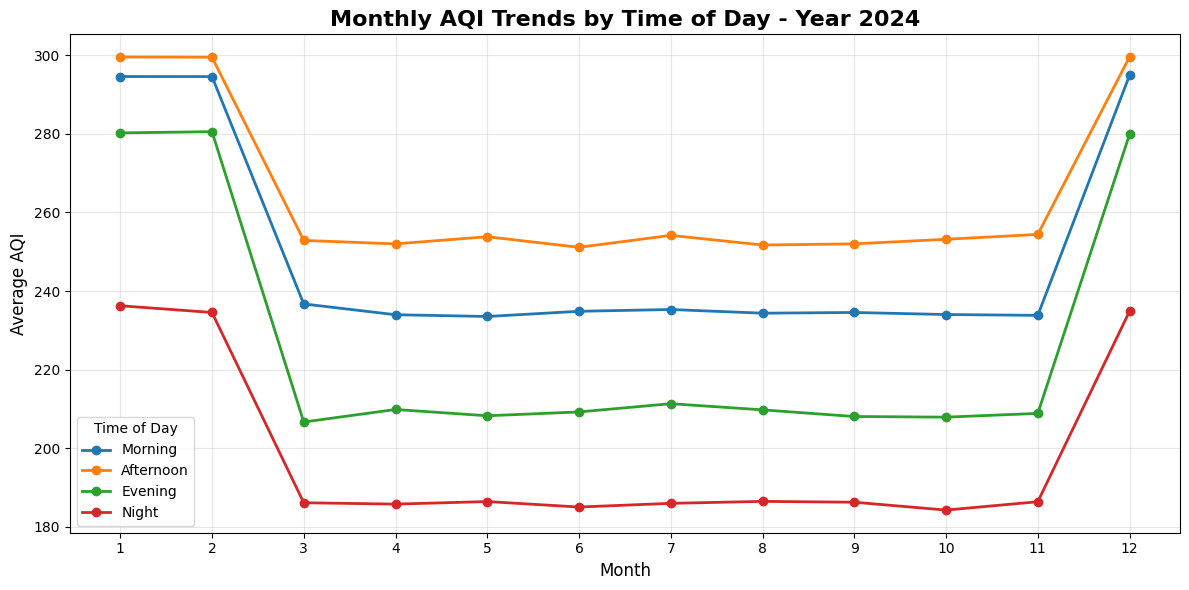

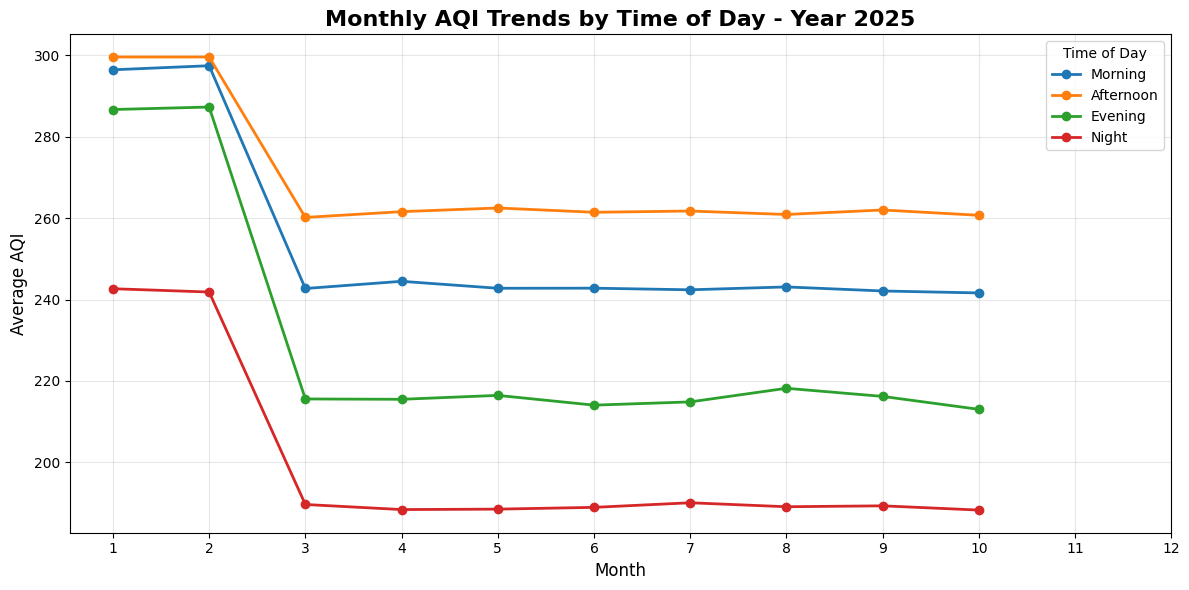

In [21]:
for year in monthly_hour_aqi['year'].unique():
    data_year = monthly_hour_aqi[monthly_hour_aqi['year']==year]
    
    plt.figure(figsize=(12,6))
    
    for tod in ['Morning', 'Afternoon', 'Evening', 'Night']:
        data_tod = data_year[data_year['time_of_day']==tod]
        plt.plot(
            data_tod['month'], 
            data_tod['AQI'], 
            marker='o', 
            linewidth=2, 
            label=tod
        )
    
    plt.title(f"Monthly AQI Trends by Time of Day - Year {year}", fontsize=16, fontweight='bold')
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Average AQI", fontsize=12)
    plt.xticks(range(1,13))
    plt.grid(alpha=0.3)
    plt.legend(title="Time of Day")
    plt.tight_layout()
    plt.show()

In [22]:
df

datetime         AQI       PM2.5        PM10         O3  \
0      2000-01-01 00:00:00  121.861086   44.200712   93.224101  20.586862   
1      2000-01-01 01:00:00   99.598077   35.212704   78.893066  22.429471   
2      2000-01-01 02:00:00  132.852834   48.575428  118.693959  37.838094   
3      2000-01-01 03:00:00  154.588259   64.208516   86.427166  26.747684   
4      2000-01-01 04:00:00  114.102260   41.112699   70.193382  33.192759   
...                    ...         ...         ...         ...        ...   
225811 2025-10-04 19:00:00  207.114725  157.607611  243.872762  46.377704   
225812 2025-10-04 20:00:00  206.927397  157.420470  243.006506  39.320982   
225813 2025-10-04 21:00:00  191.182348  133.664097  222.090884  47.043134   
225814 2025-10-04 22:00:00  176.907248  106.569957  169.771198  41.824699   
225815 2025-10-04 23:00:00  187.985824  127.597094  230.334810  38.649642   

              NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
0       15.391414  28.219932  1.049477    20.956667  71.272569    8.375675   
1       26.824534  24.385188  0.943859    13.761031  42.616871   10.880553   
2       33.403493  28.951413  0.887131    20.216907  59.169387   15.041183   
3       12.137395  26.950990  0.793261    18.642574  62.756439    9.904413   
4       25.313206  20.741976  1.059887    18.834718  56.369280   14.632070   
...           ...        ...       ...          ...        ...         ...   
225811  38.243954  26.807971  1.243414    28.259699  62.551322   11.818046   
225812  40.727546  35.334455  1.648275    24.709986  55.136078    8.800161   
225813  29.740886  31.693231  1.516578    23.832922  68.360762   13.813644   
225814  24.414738  28.654861  1.890719    23.119236  68.842075   11.024805   
225815  32.247229  22.446088  1.949910    19.342047  60.956672    8.055435   

           Pressure  year             AQI_category  month  hour time_of_day  
0       1011.742574  2000  Unhealthy for Sensitive      1     0       Night  
1       1010.949986  2000                 Moderate      1     1       Night  
2       1012.065387  2000  Unhealthy for Sensitive      1     2       Night  
3       1010.162227  2000                Unhealthy      1     3       Night  
4       1007.067421  2000  Unhealthy for Sensitive      1     4       Night  
...             ...   ...                      ...    ...   ...         ...  
225811  1012.764603  2025           Very Unhealthy     10    19     Evening  
225812  1017.514260  2025           Very Unhealthy     10    20     Evening  
225813  1020.041276  2025                Unhealthy     10    21       Night  
225814  1015.671335  2025                Unhealthy     10    22       Night  
225815  1020.880531  2025                Unhealthy     10    23       Night  

[225816 rows x 17 columns]

## Feature Importance using Corelation

In [23]:
# LETS DROP COLUMNS [AQI_category,datetime,time_of_day]
# DATETIME BEACAURE WE EXTRACT THE IMPORTANT INFORMATION LIKE MOTH YEAR HOUR 

#BUT HERE A CATCH THAT LINEAR AND SVM MODELS ARE NOT ABLE TO CAPTURE CORRECTLY AS IT ITS TREATS HOURS AND MONTH OF HIGHER VALUES HAS HIGHR WEIGTHAGE 
df.drop(columns = ["AQI_category","datetime","time_of_day"],inplace = True)

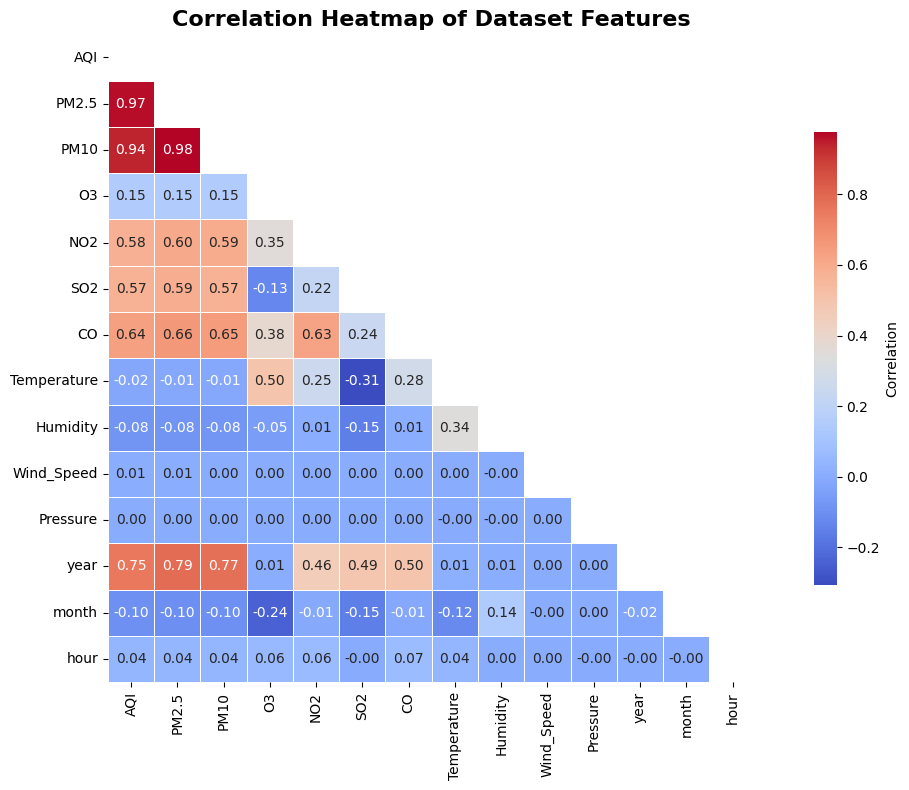

feature importance is         Feature  Correlation
0         PM2.5     0.965536
1          PM10     0.942241
2          year     0.753956
3            CO     0.635649
4           NO2     0.581389
5           SO2     0.571672
6            O3     0.148527
7          hour     0.040921
8    Wind_Speed     0.005324
9      Pressure     0.002627
10  Temperature    -0.015848
11     Humidity    -0.084323
12        month    -0.100692


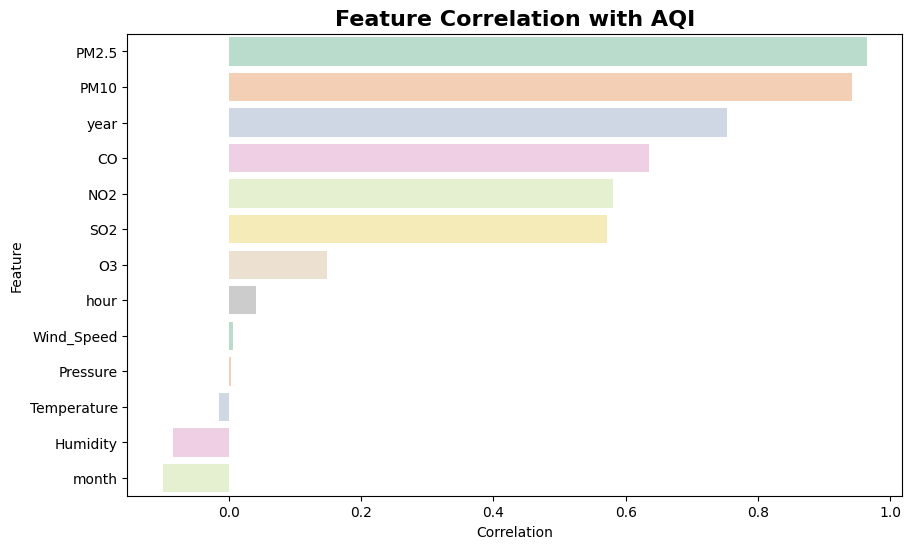

In [24]:
# lets find out the corelation of every feature to our target feature (aiq)
cor = df.corr()

# lets plot a heatgraph for showing correlation
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a mask for the upper triangle (optional, for better readability)
mask = np.triu(np.ones_like(cor, dtype=bool))

# Draw the heatmap with seaborn
sns.heatmap(
    cor, 
    mask=mask, 
    annot=True,          # Show correlation values
    fmt=".2f",          # Format to 2 decimal places
    cmap="coolwarm",    # Color map
    linewidths=0.5,     # Lines between cells
    cbar_kws={"shrink": 0.7, "label": "Correlation"},  # Color bar options
    square=True
)

# Title
plt.title("Correlation Heatmap of Dataset Features", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

feature = cor["AQI"].sort_values(ascending = False)[1:]
feature_df = feature.reset_index()
feature_df.columns = ["Feature", "Correlation"]
print(f"feature importance is {feature_df}")

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Correlation", y="Feature", data=feature_df, palette="Pastel2")
plt.title("Feature Correlation with AQI", fontsize=16, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

## Modelling

In [25]:
# lets do train test split 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns = "AQI"),df["AQI"],test_size = 0.2,random_state= 1)

In [26]:
# importing models

from sklearn.linear_model import LinearRegression       # Ordinary Least Squares
from sklearn.linear_model import Ridge                  # L2 regularized
from sklearn.linear_model import Lasso                  # L1 regularized
from sklearn.linear_model import ElasticNet             # L1 + L2 regularization
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
lr = LinearRegression()
l1 = Ridge()
l2 = Lasso()
l = ElasticNet()
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()
adboost = AdaBoostRegressor()
tre =DecisionTreeRegressor()
models = [lr,l1,l2,l,forest,boost,adboost,tre]


In [27]:
from sklearn.metrics import r2_score
result = {}
for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = r2_score(ytest,i.predict(xtest))
    print(f"r2 score for {i }",r2)

    result[i] = r2*100
    print("\n====================\n")

LinearRegression() succesfully trained
r2 score for LinearRegression() 0.9322695100058387


Ridge() succesfully trained
r2 score for Ridge() 0.9322695098687602


Lasso() succesfully trained
r2 score for Lasso() 0.9322135827867458


ElasticNet() succesfully trained
r2 score for ElasticNet() 0.9322462364878559


RandomForestRegressor() succesfully trained
r2 score for RandomForestRegressor() 0.9999999946503957


GradientBoostingRegressor() succesfully trained
r2 score for GradientBoostingRegressor() 0.9999069399943835


AdaBoostRegressor() succesfully trained
r2 score for AdaBoostRegressor() 0.9931655339217286


DecisionTreeRegressor() succesfully trained
r2 score for DecisionTreeRegressor() 0.9999999788787592




# Model Training Results and Observations

## 1. Regression Models Performance

| Model                       | R² Score          | Observation |
|------------------------------|-----------------|-------------|
| Linear Regression           | 0.9323          | Good linear fit, captures most variance. |
| Ridge Regression            | 0.9323          | Similar performance as Linear Regression, regularization helps prevent overfitting. |
| Lasso Regression            | 0.9322          | Slightly lower, L1 regularization may drop some less important features. |
| ElasticNet                  | 0.9322          | Combines L1 and L2 regularization, performance similar to Ridge/Lasso. |
| Random Forest Regressor     | 0.99999999      | Extremely high accuracy, captures non-linear patterns well. |
| Gradient Boosting Regressor | 0.99990694      | Very high accuracy, handles non-linear relationships effectively. |
| AdaBoost Regressor          | 0.99397         | High accuracy, less sensitive to overfitting compared to RF/GB. |
| Decision Tree Regressor     | 0.99999998      | Extremely high accuracy, may overfit the data. |

---

## 2. Final Observations

- **Linear models** (Linear, Ridge, Lasso, ElasticNet) perform well, but cannot capture non-linear relationships fully.  
- **Tree-based models** (Random Forest, Gradient Boosting, Decision Tree, AdaBoost) outperform linear models with R² ≈ 0.999, indicating strong predictive power.  
- **Random Forest and Decision Tree** may overfit, especially with very high R² on training data.  
- The dataset is **well-prepared**, with no missing values or anomalies, allowing models to achieve high performance.

---

## 3. Further Work / Recommendations

1. **Cross-validation and Test Set Evaluation**  
   - Ensure these high R² values are not due to overfitting by evaluating on a separate test set or using k-fold cross-validation.  

2. **Feature Importance Analysis**  
   - Use tree-based models to identify the most influential features affecting AQI prediction.  

3. **Hyperparameter Tuning**  
   - Optimize tree-based models (RF, GB, AdaBoost) using GridSearchCV or RandomizedSearchCV for better generalization.  

4. **Time-Series Forecasting**  
   - Since AQI has a temporal pattern, try models like ARIMA, SARIMA, or LSTM for future predictions.  

5. **Scenario Analysis**  
   - Investigate seasonal, monthly, or hourly AQI trends and how environmental factors impact AQI predictions.  

6. **Deployment / Real-Time Monitoring**  
   - Build a real-time AQI prediction system using the best-performing model for city-level monitoring and alerts.


THANKS IF YOU LIKE MY WORK ,PLEASE UPVOTES